In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0,'../../')

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from medline.mesh_tree import MeshTree

tree = MeshTree()

In [5]:
import networkx as nx

G = nx.relabel_nodes(tree.graph, tree.number_term)

In [6]:
from medline.data import read_classes

terms = read_classes()
terms = [t.lower() for t in terms]

In [7]:
G = G.subgraph(terms)

In [8]:
# nx.write_adjlist(G, 'mesh_adjlist.txt', delimiter='\t',)

In [9]:
graphs = [[n] + list(G.predecessors(n)) for n in G.nodes()
          if G.in_degree(n) >= 3 and G.in_degree(n) <= 6]
len(graphs)

177

In [10]:
graphs = {nbunch[0]: nx.subgraph(G, nbunch) for nbunch in graphs}

/home/tomi/env/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


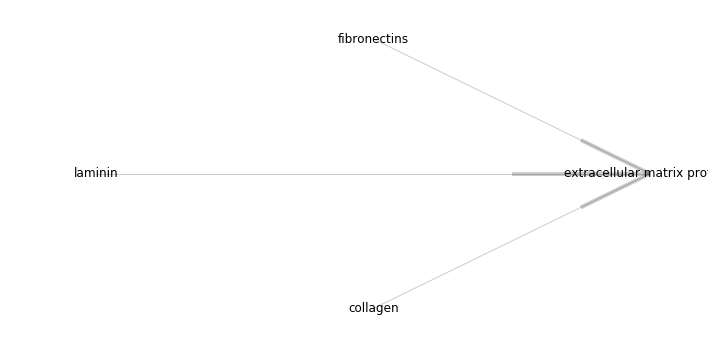

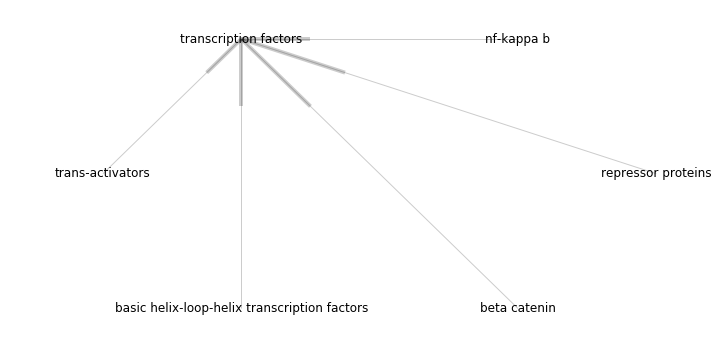

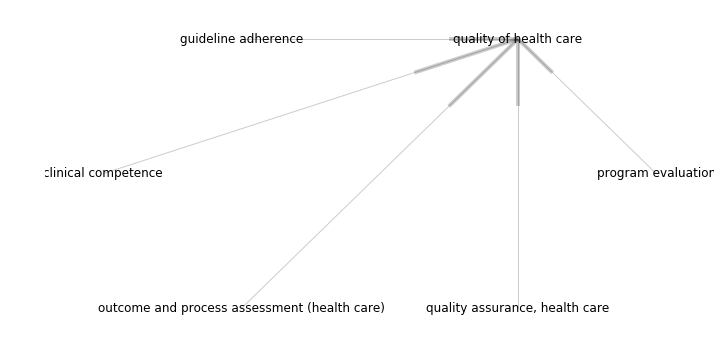

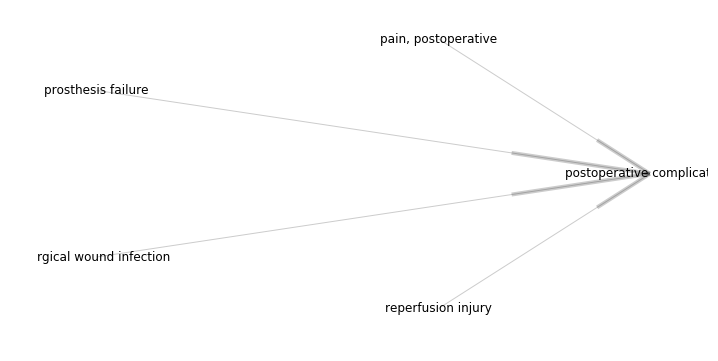

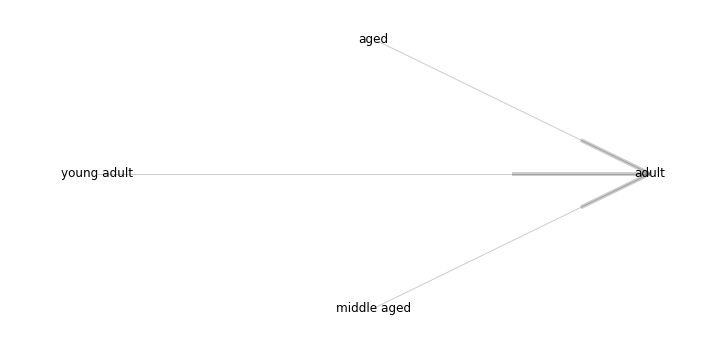

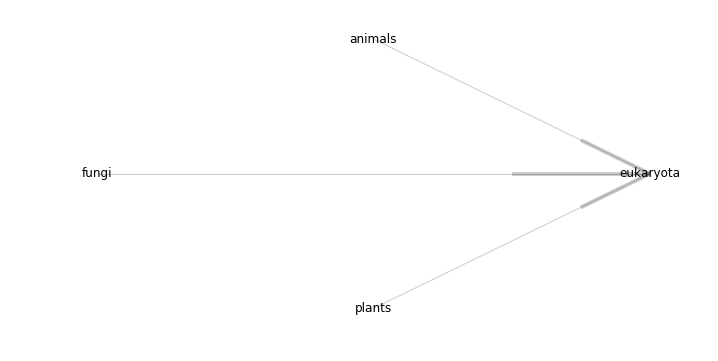

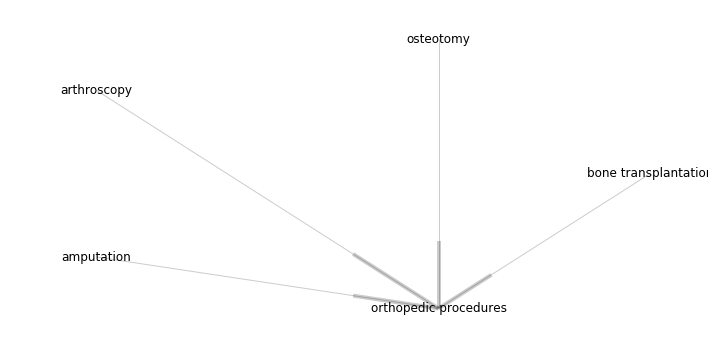

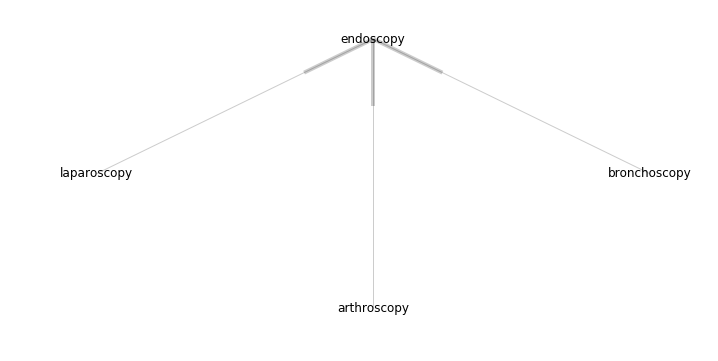

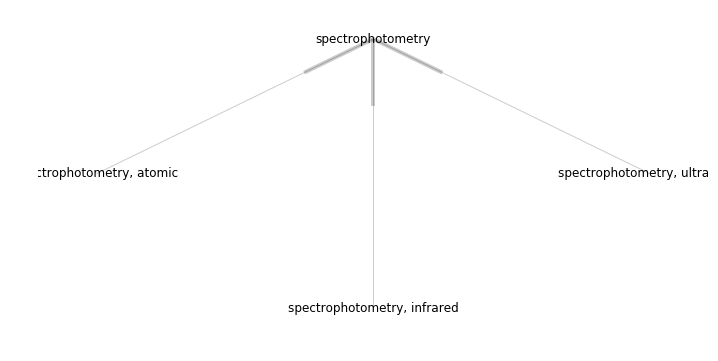

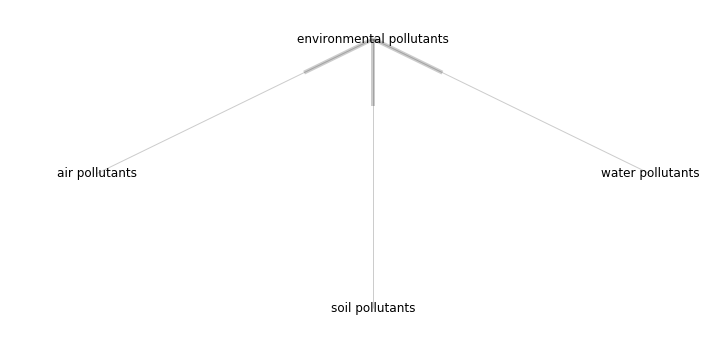

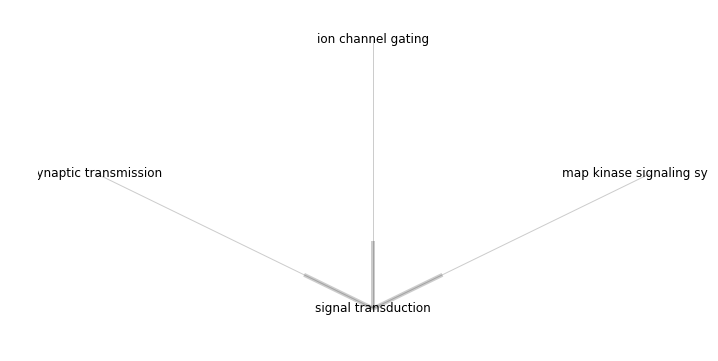

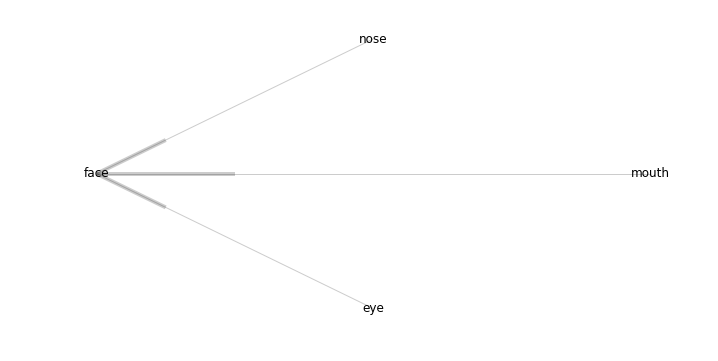

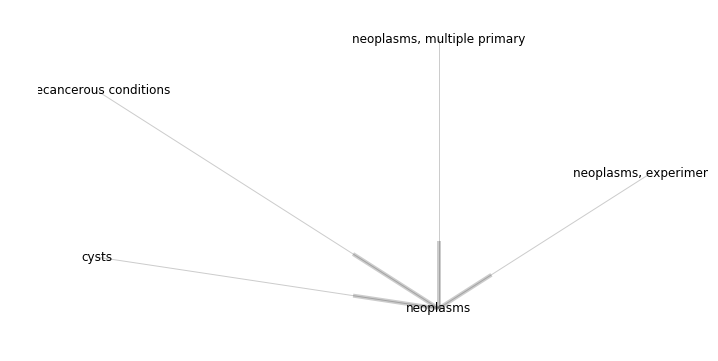

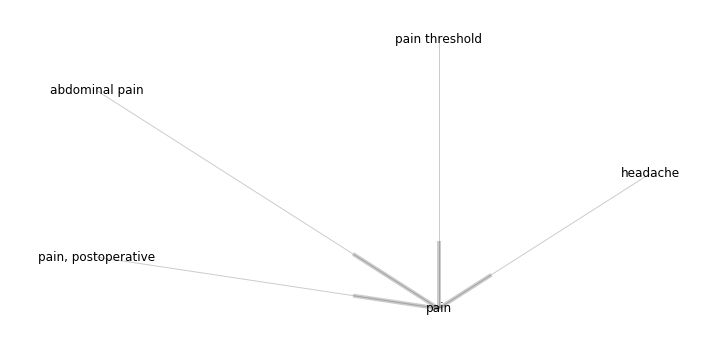

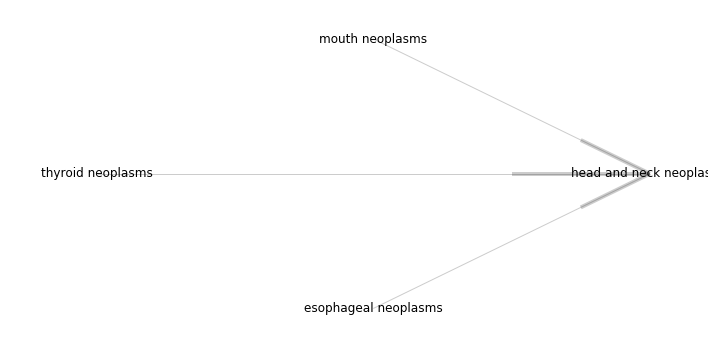

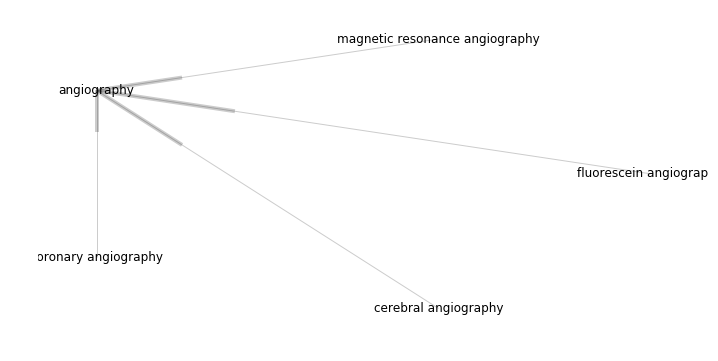

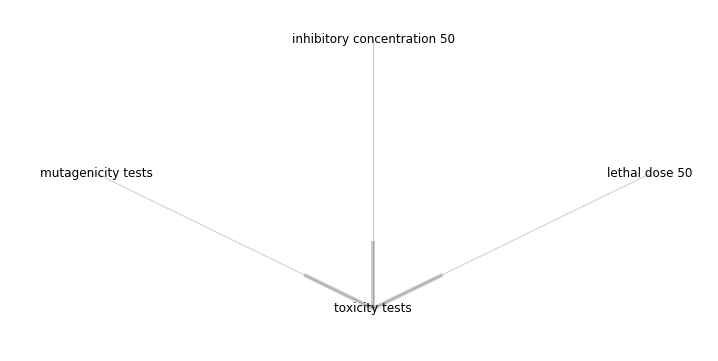

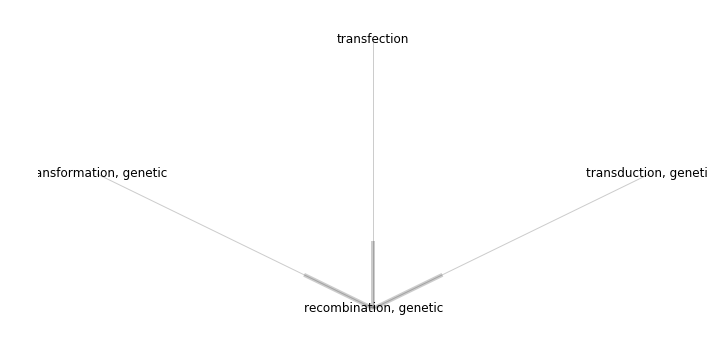

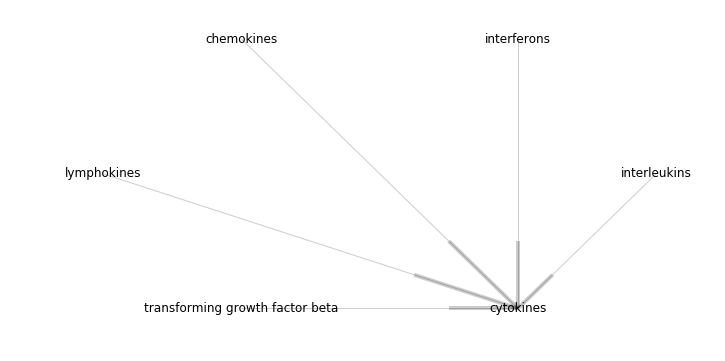

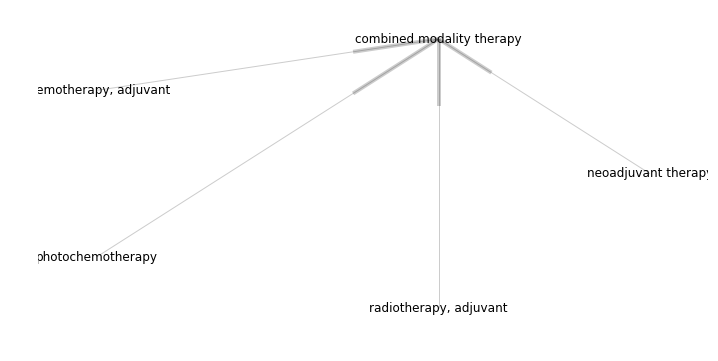

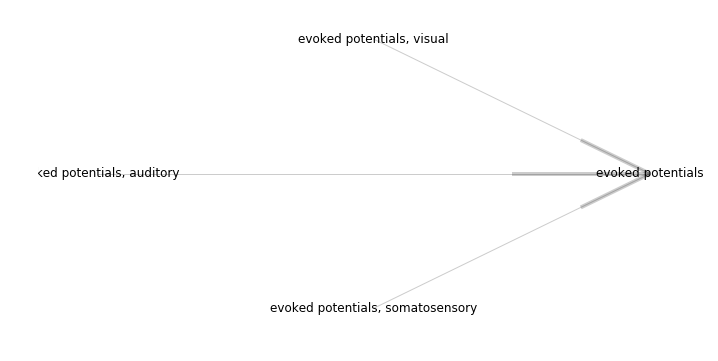

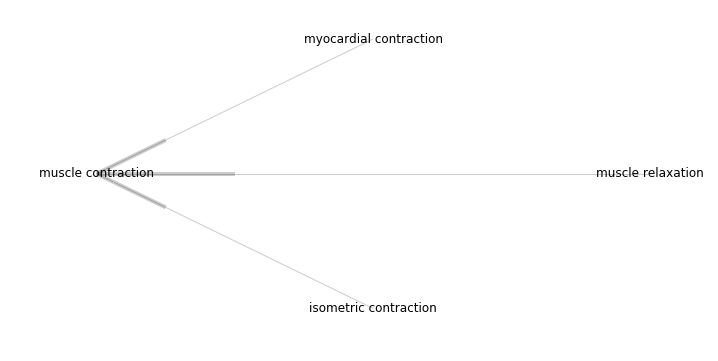

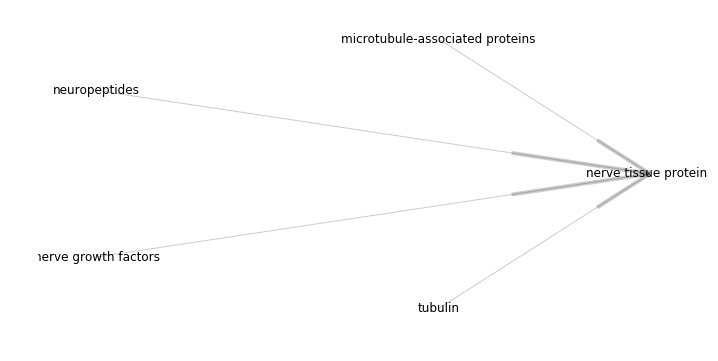

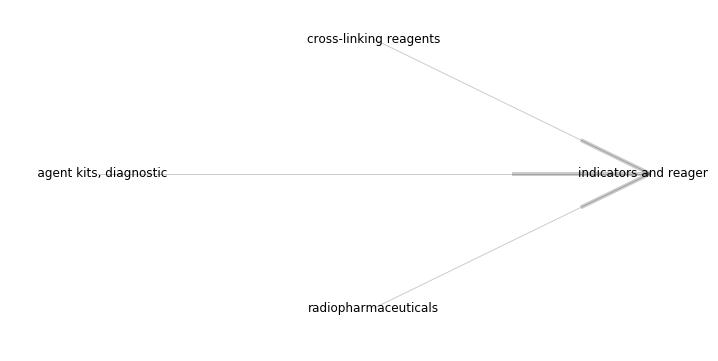

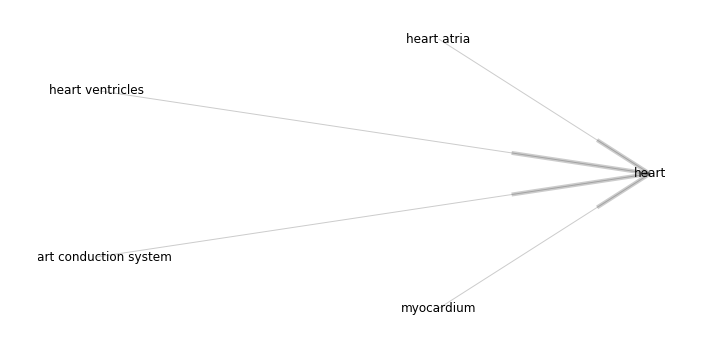

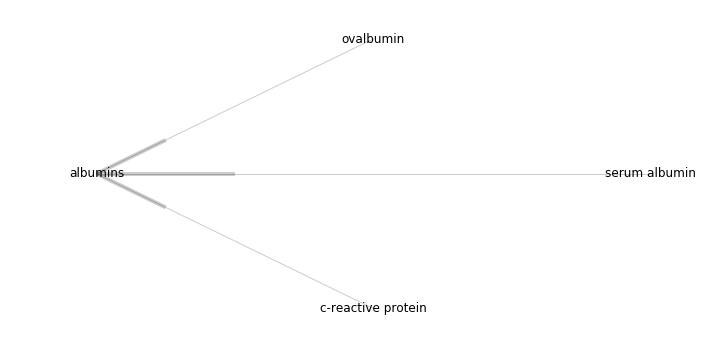

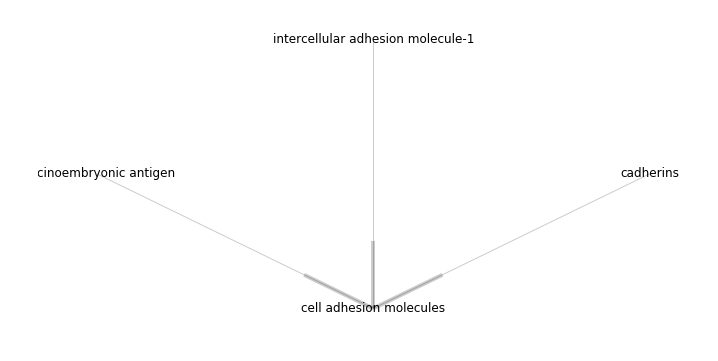

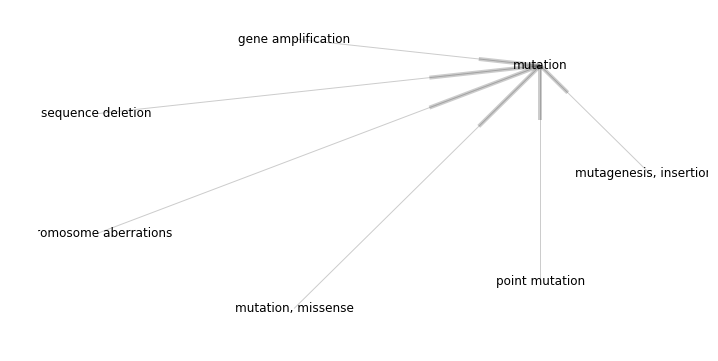

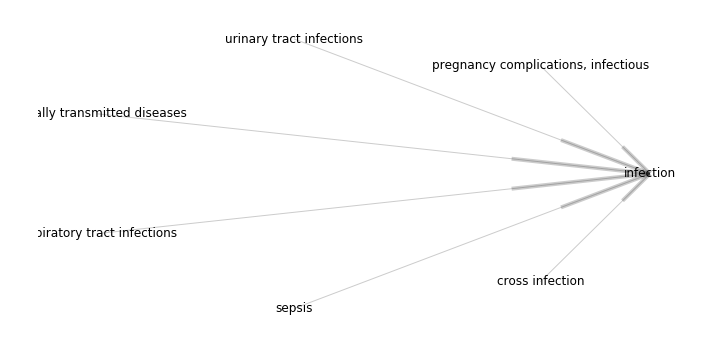

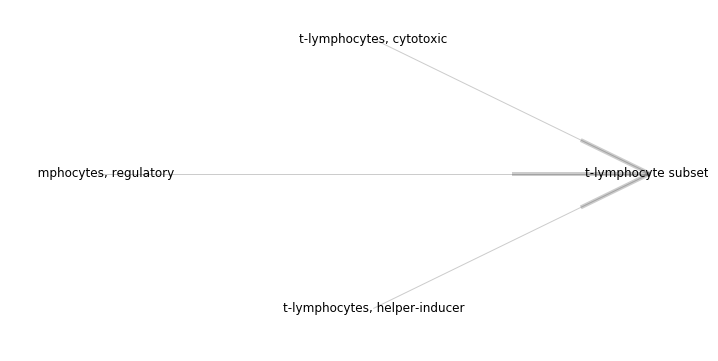

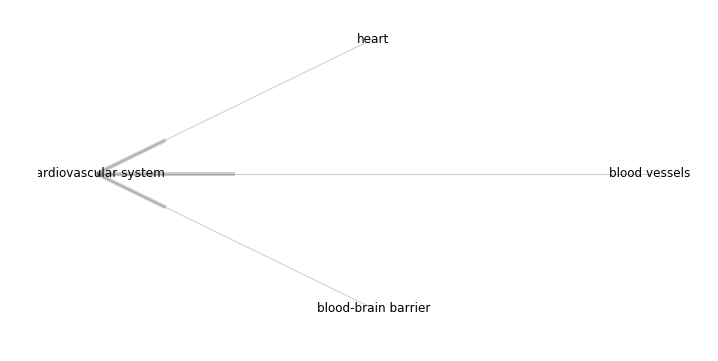

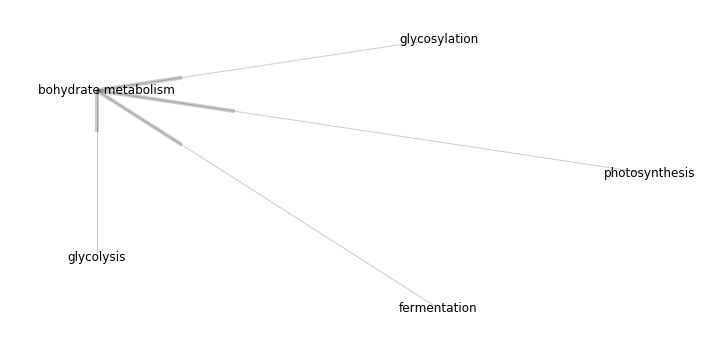

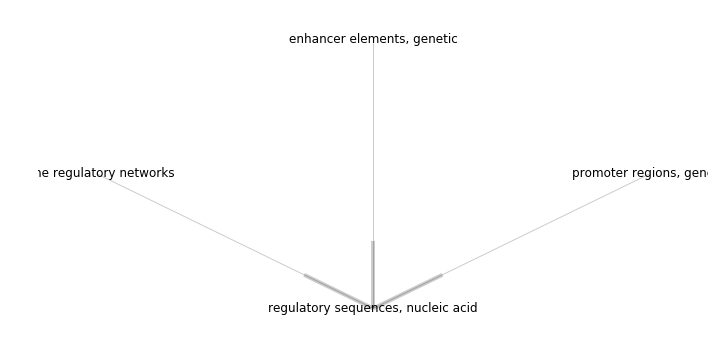

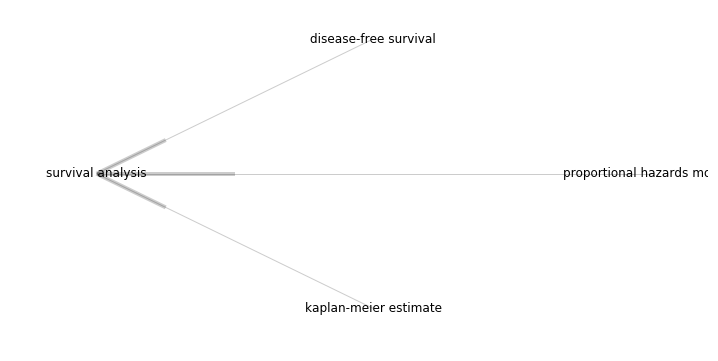

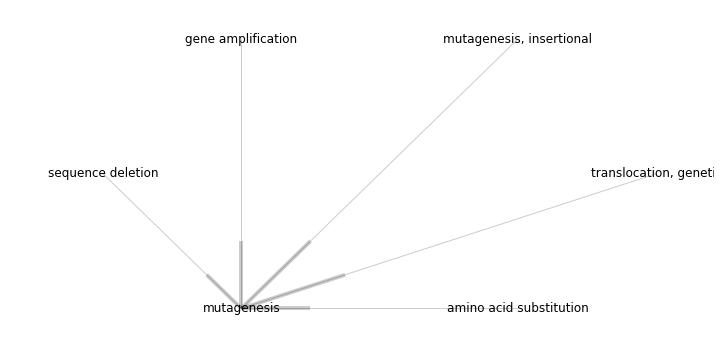

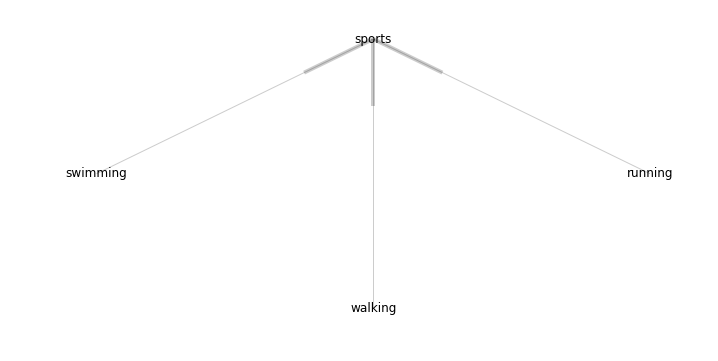

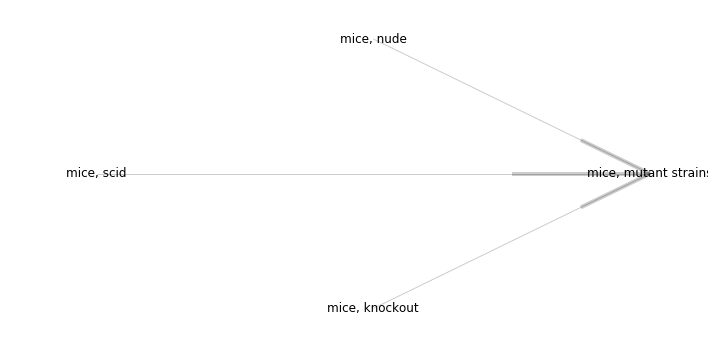

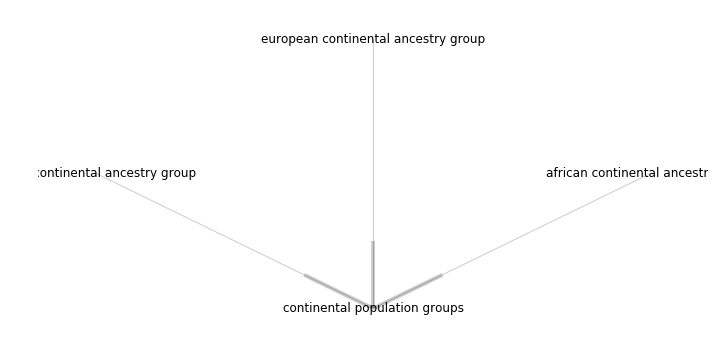

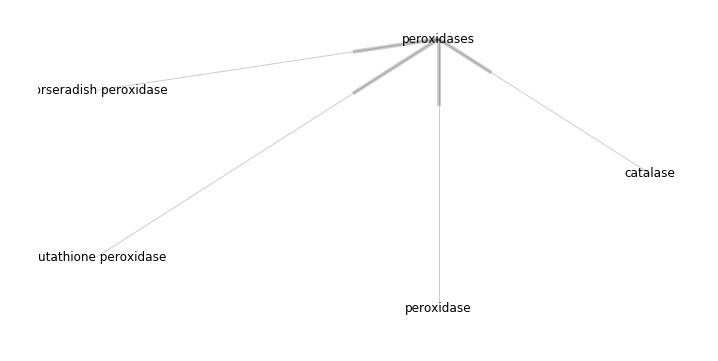

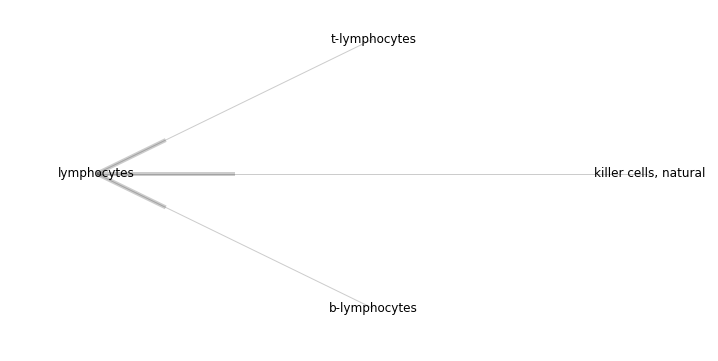

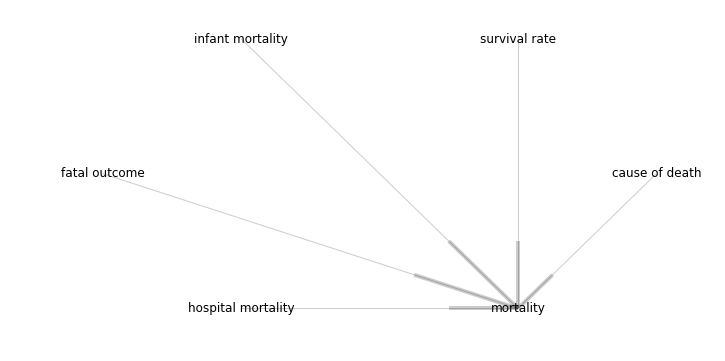

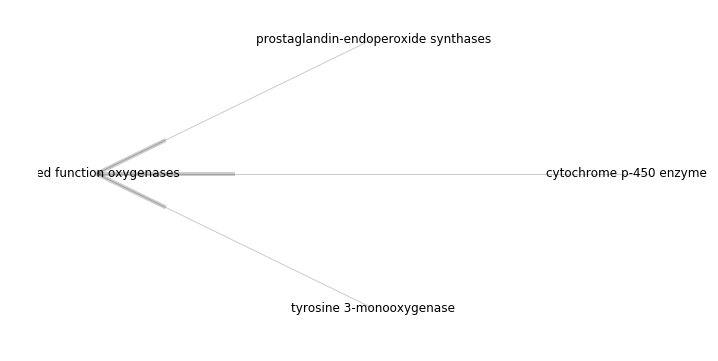

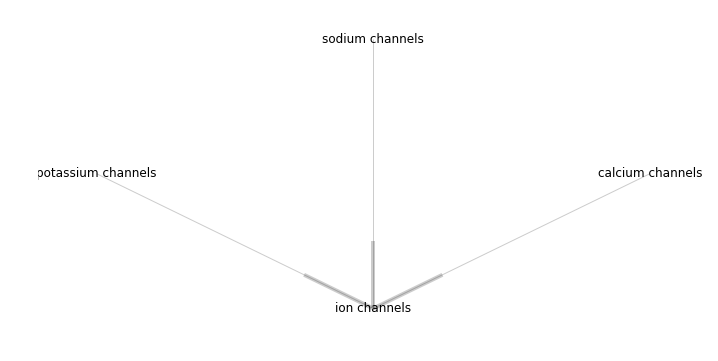

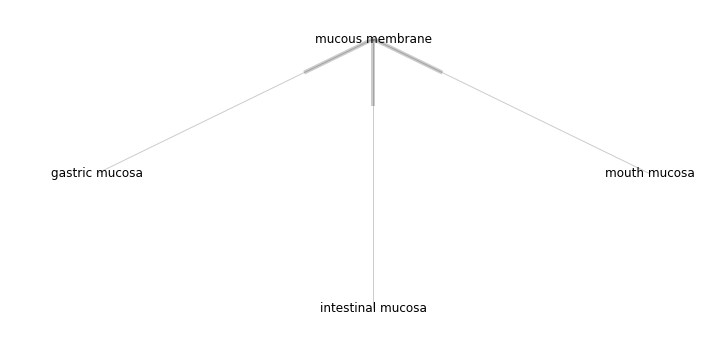

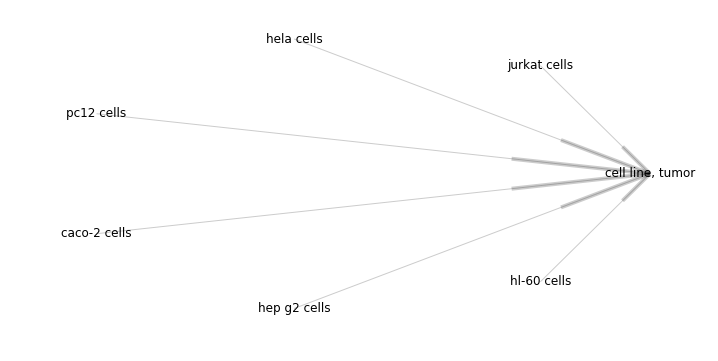

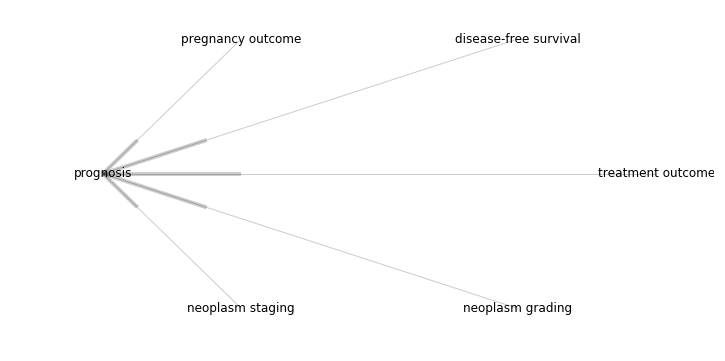

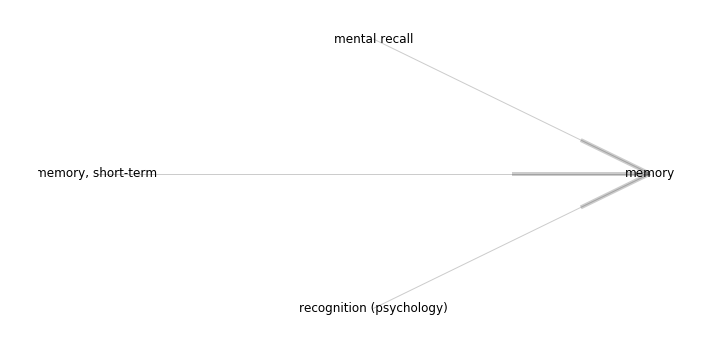

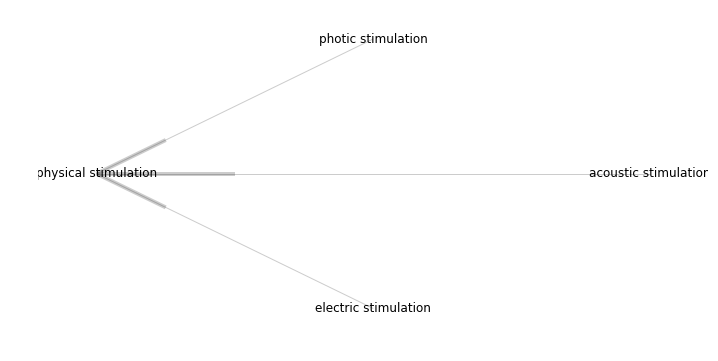

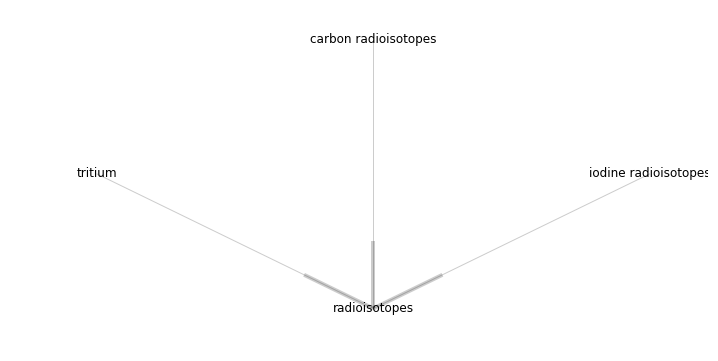

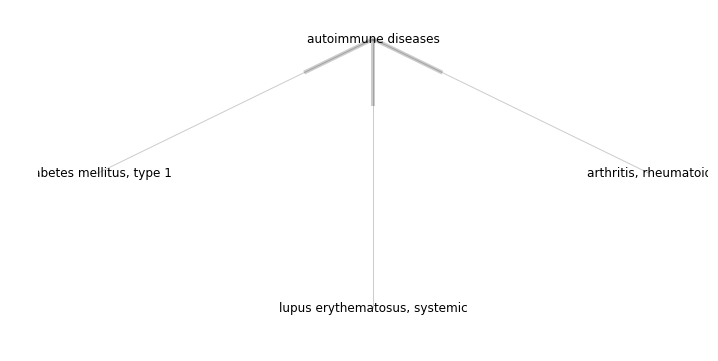

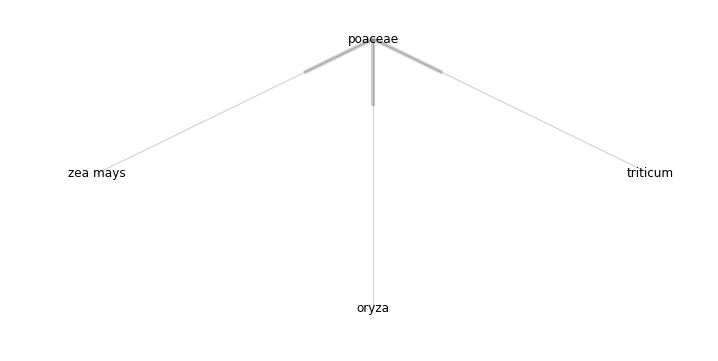

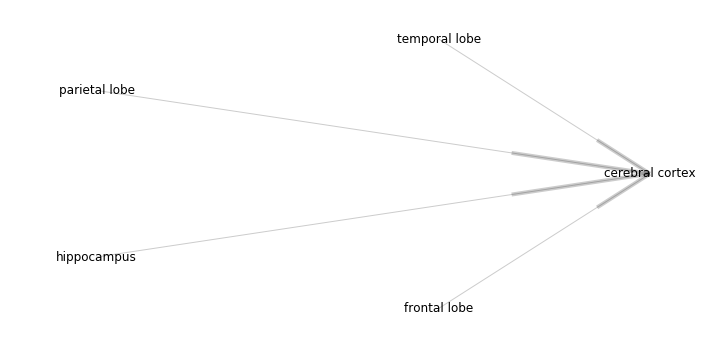

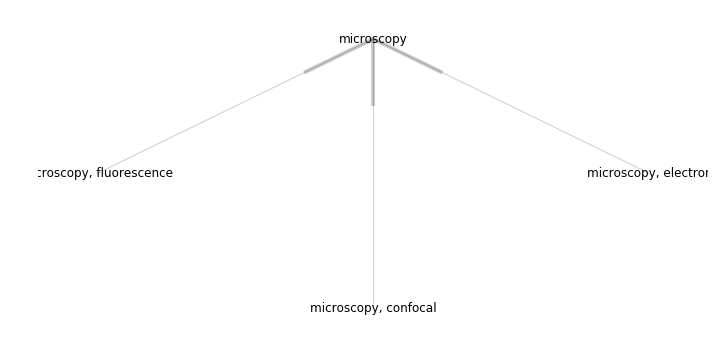

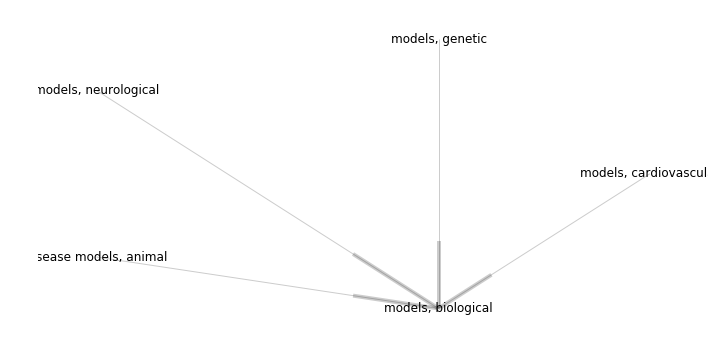

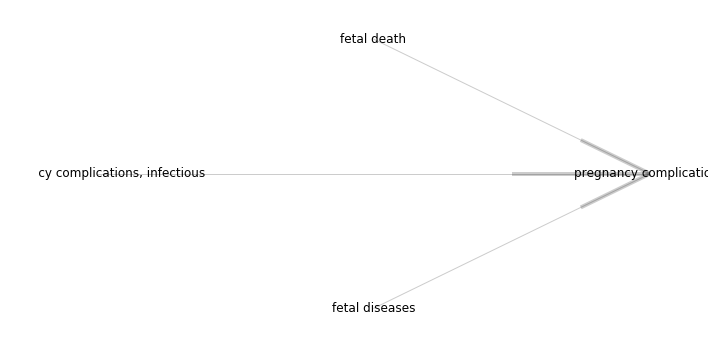

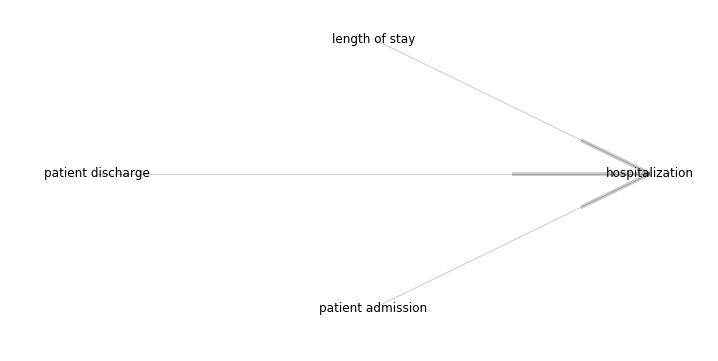

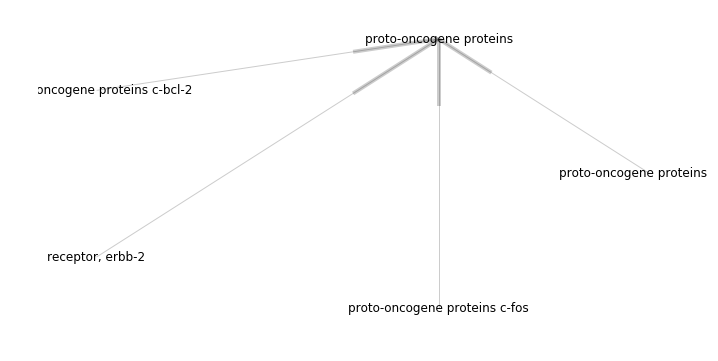

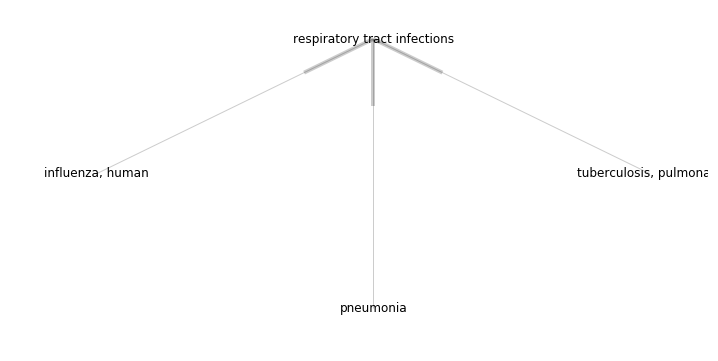

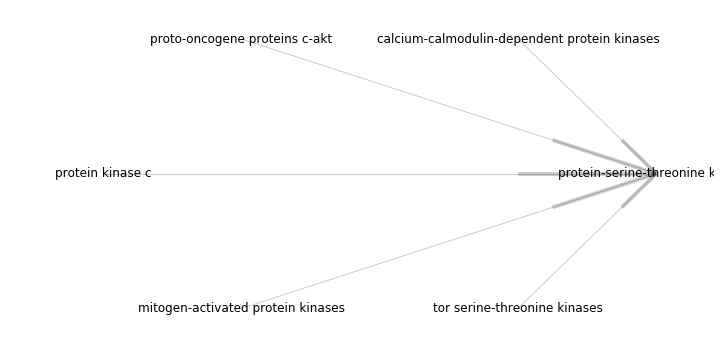

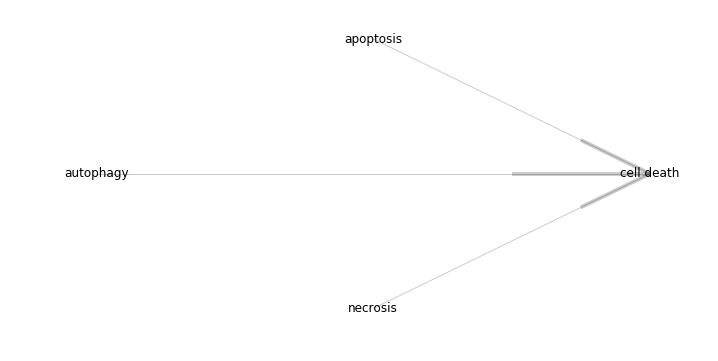

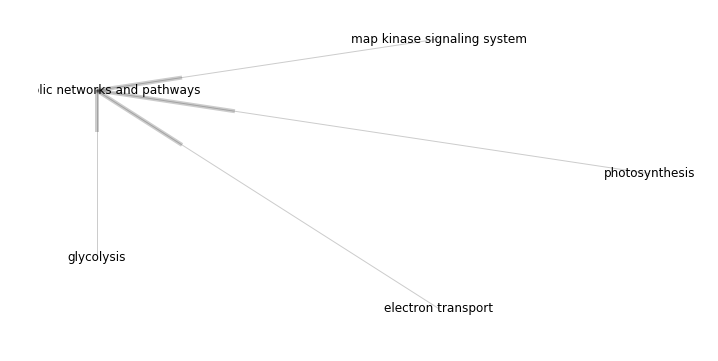

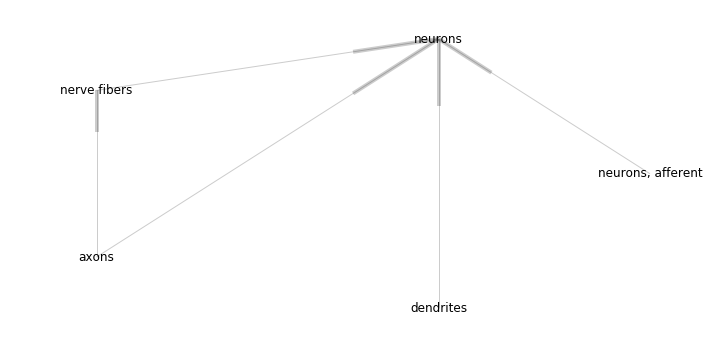

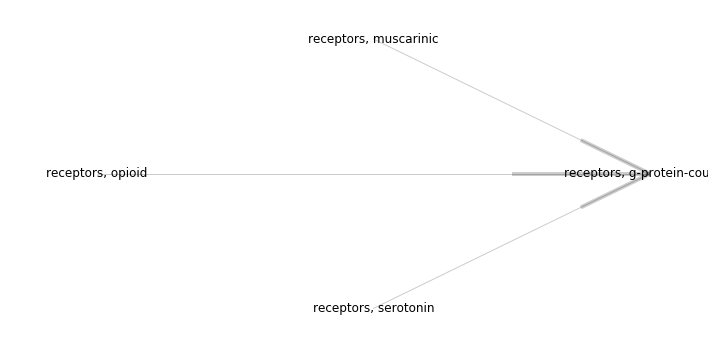

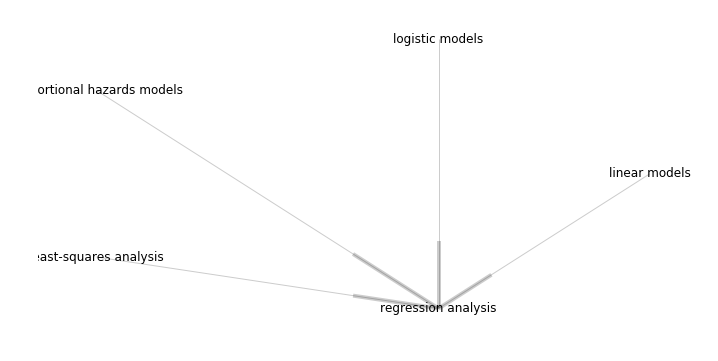

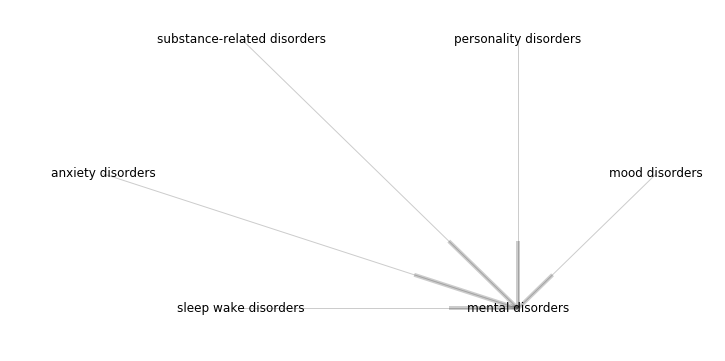

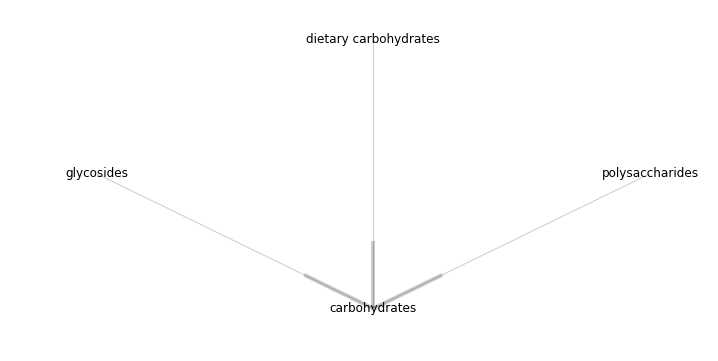

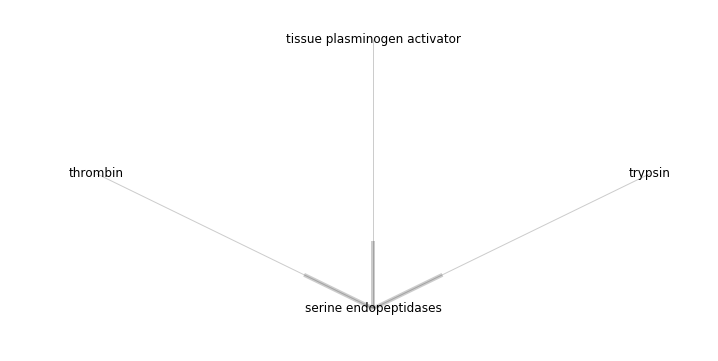

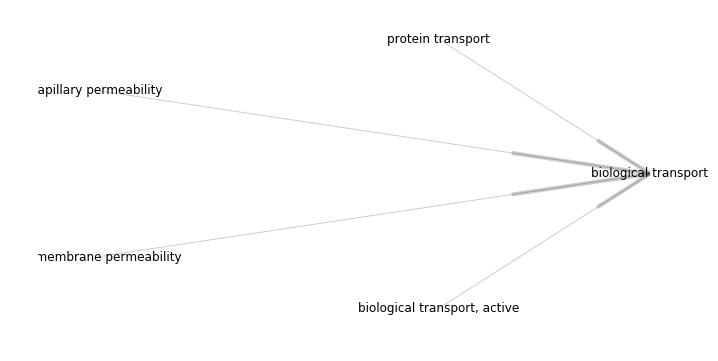

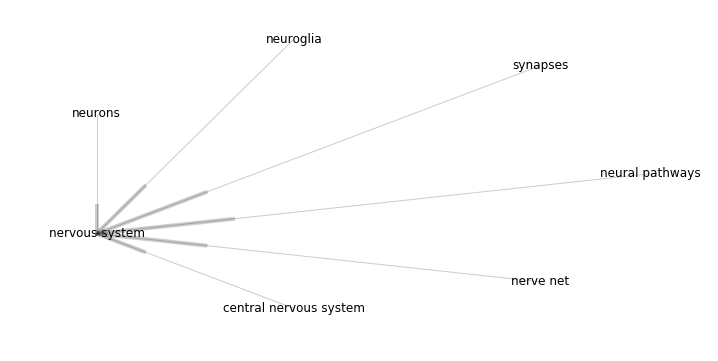

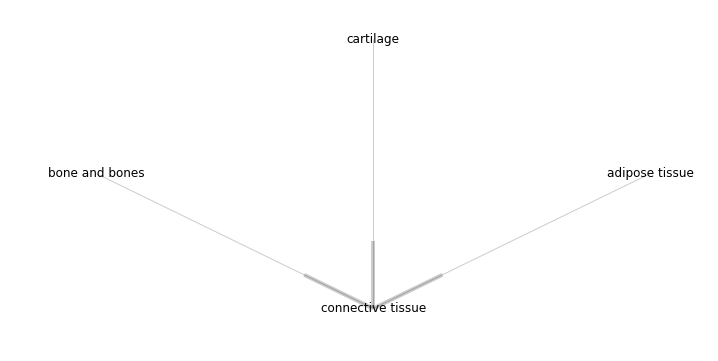

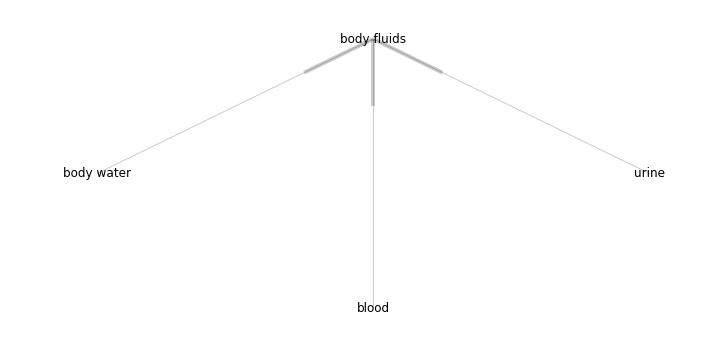

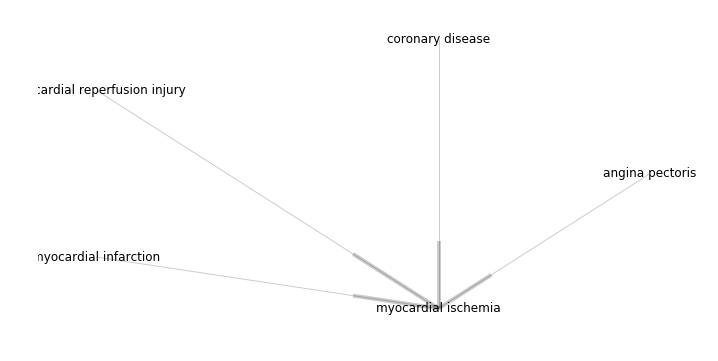

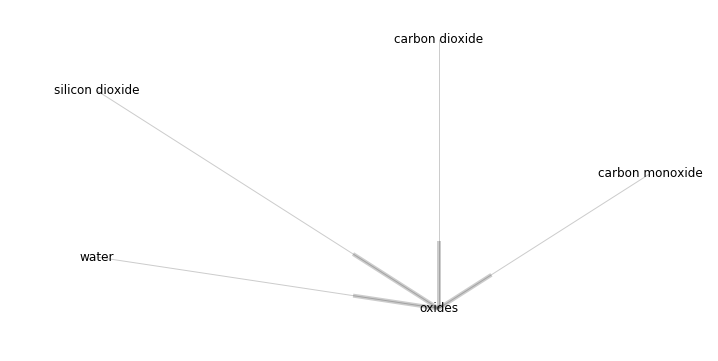

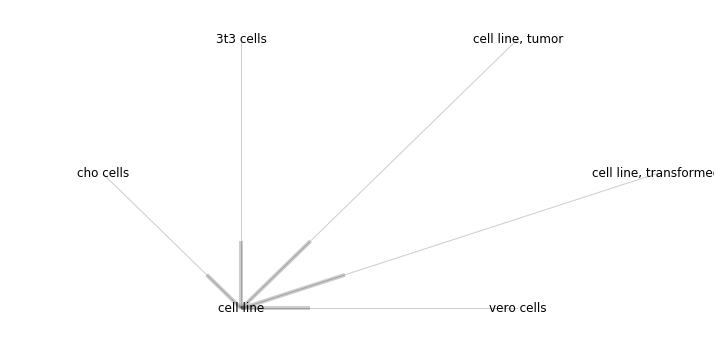

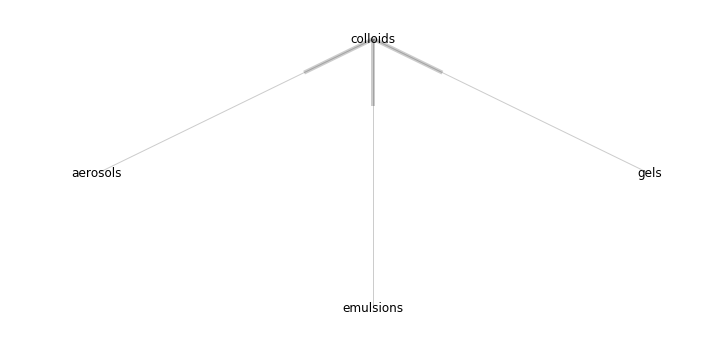

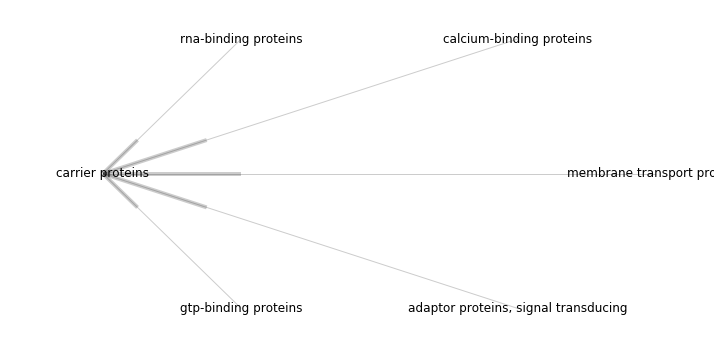

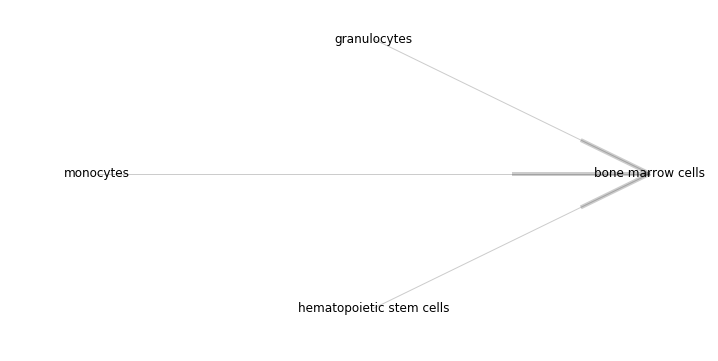

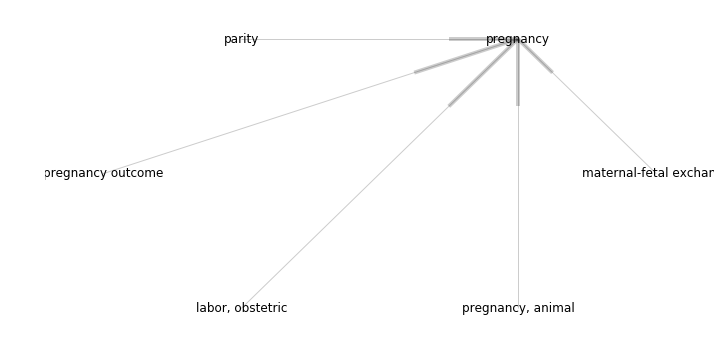

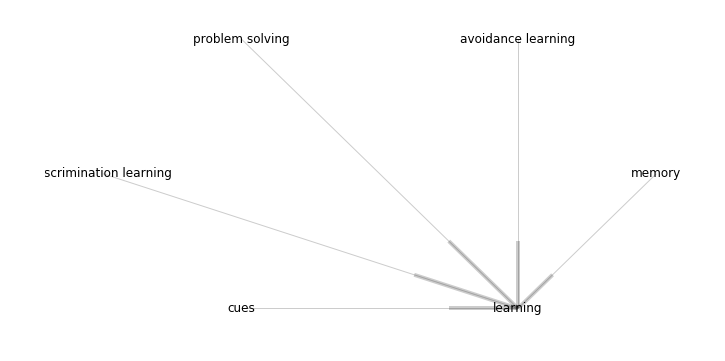

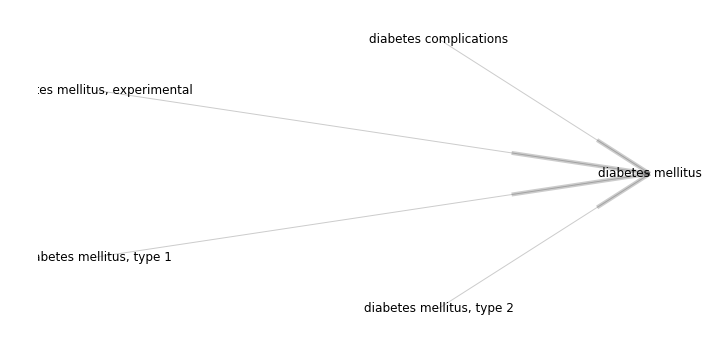

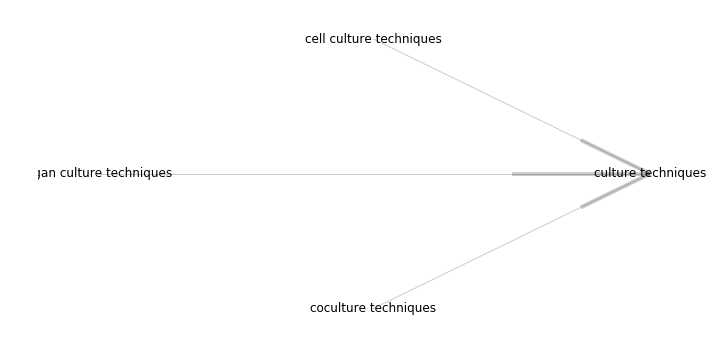

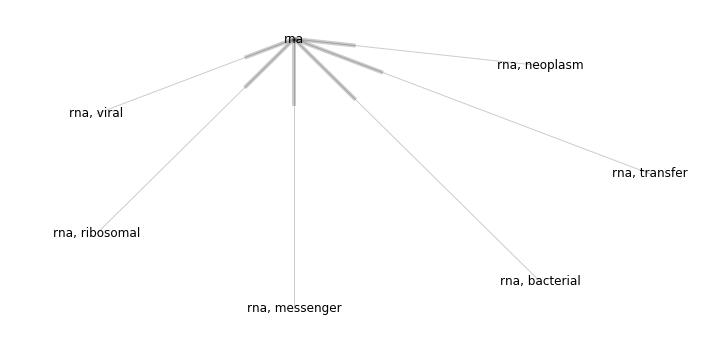

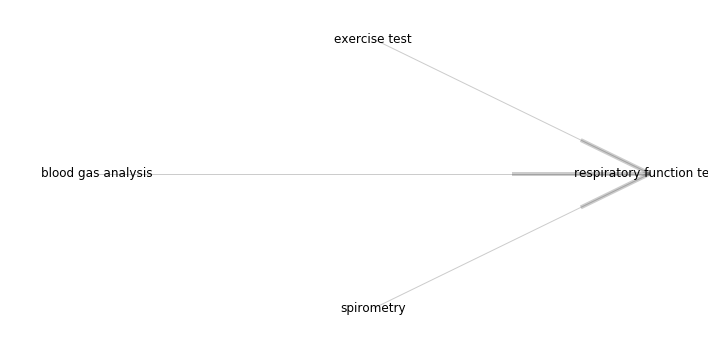

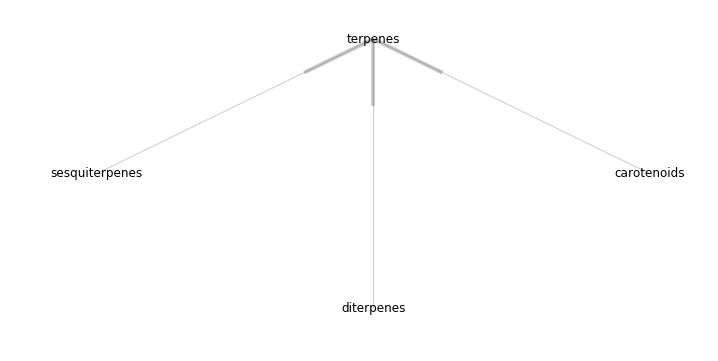

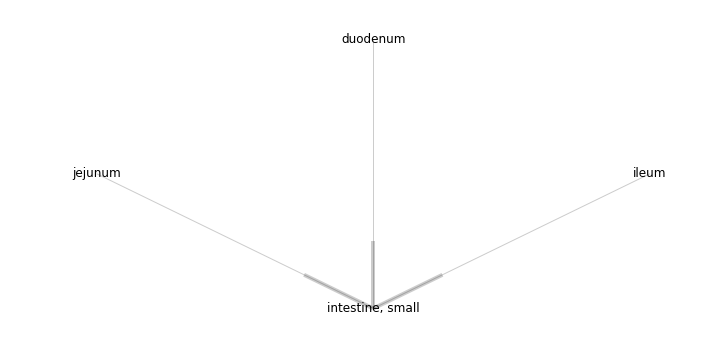

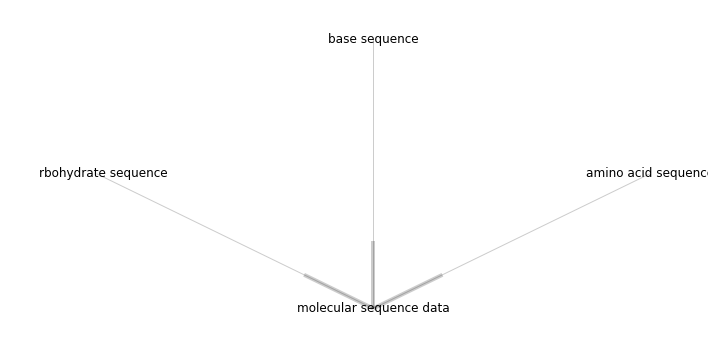

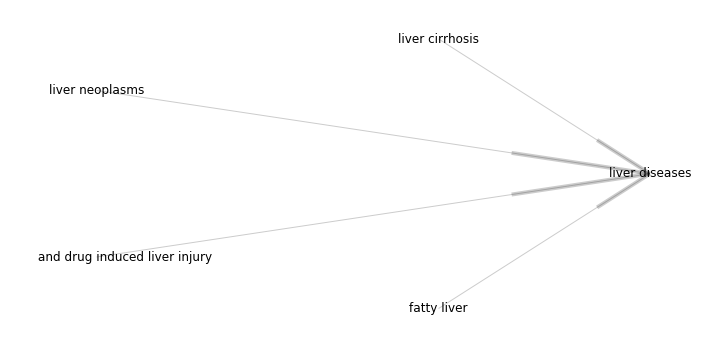

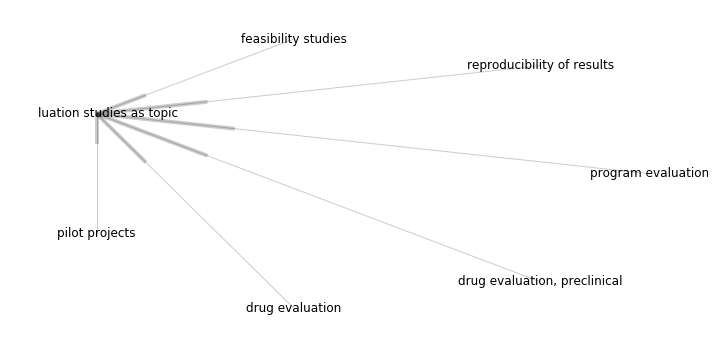

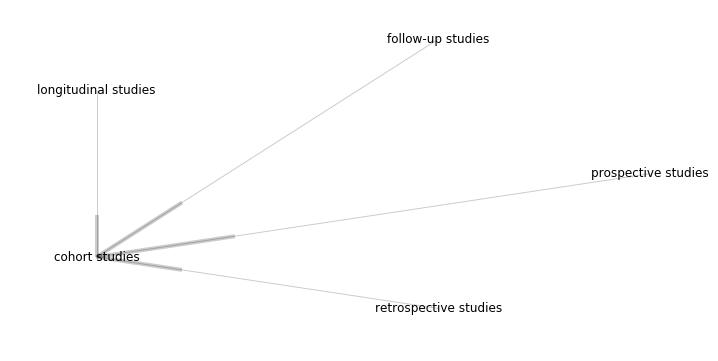

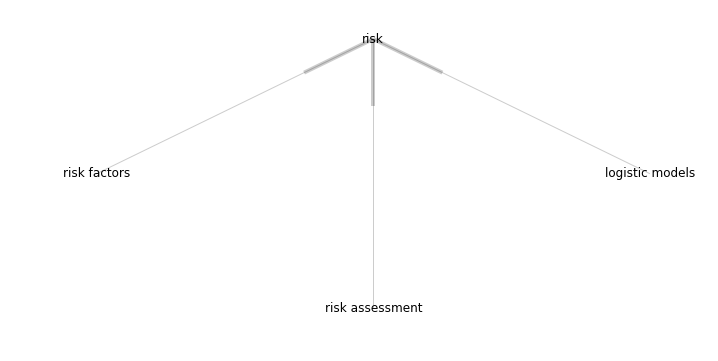

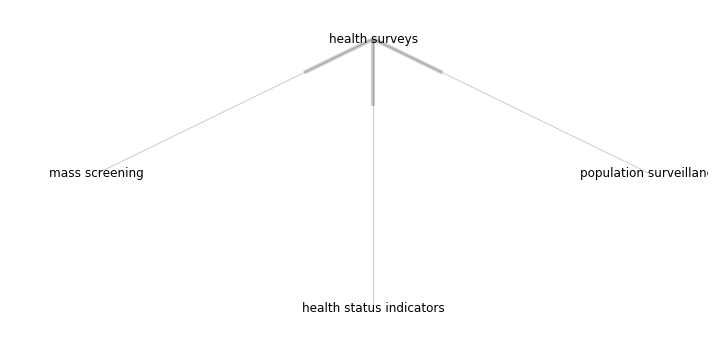

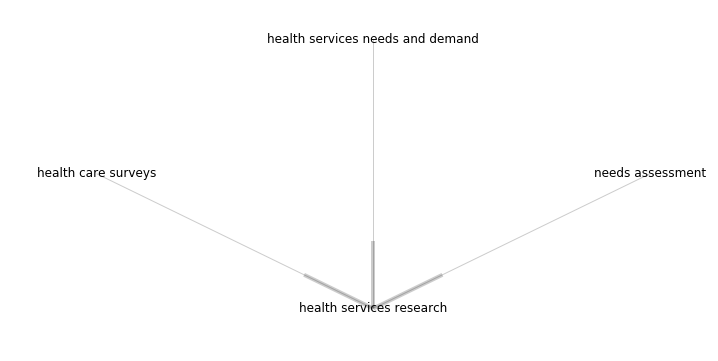

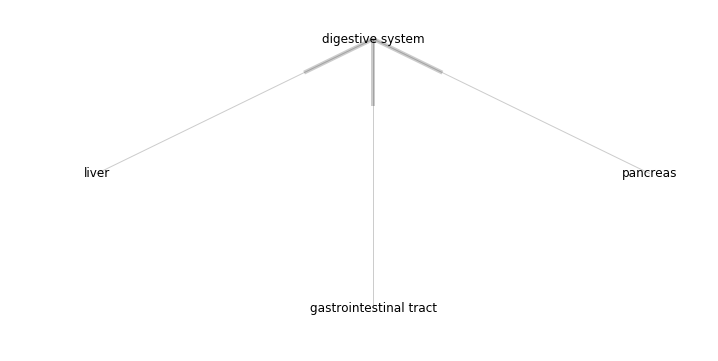

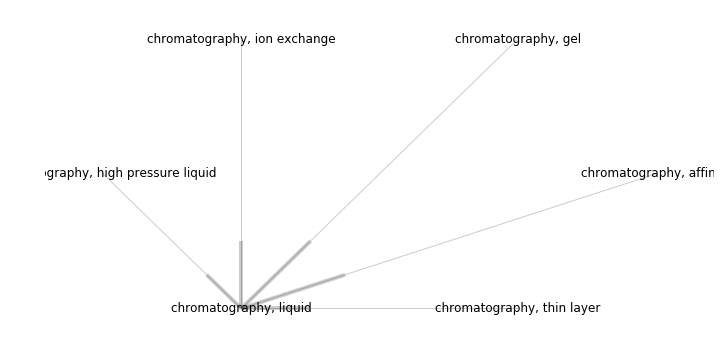

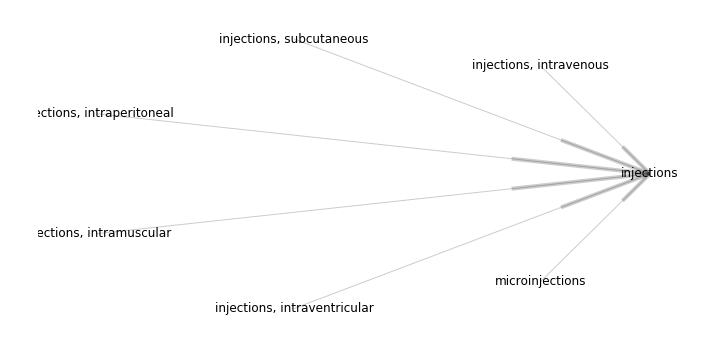

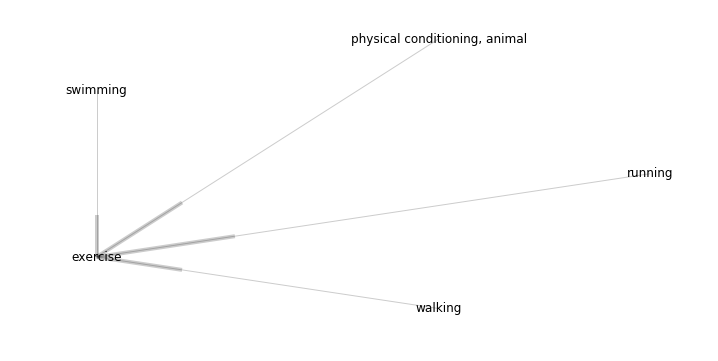

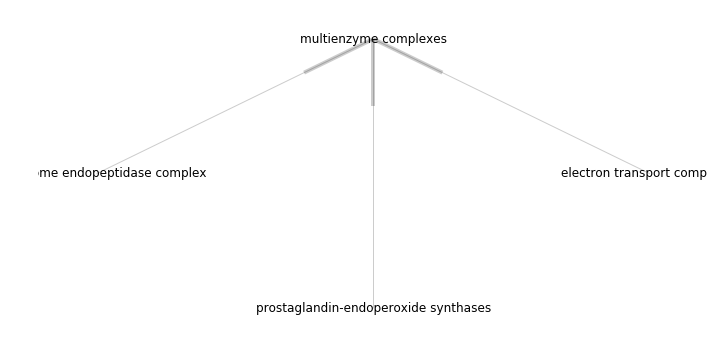

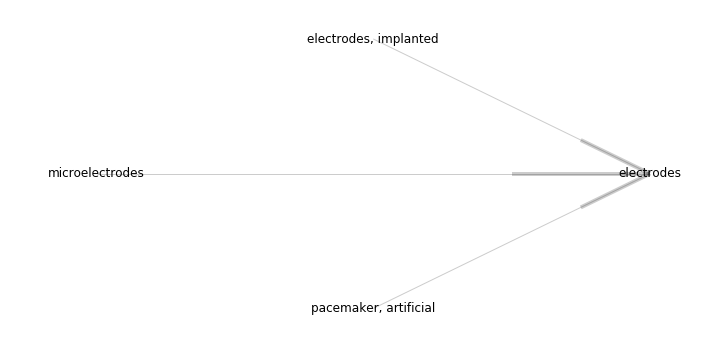

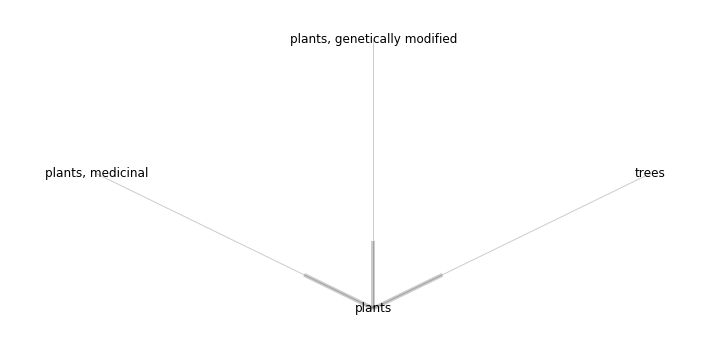

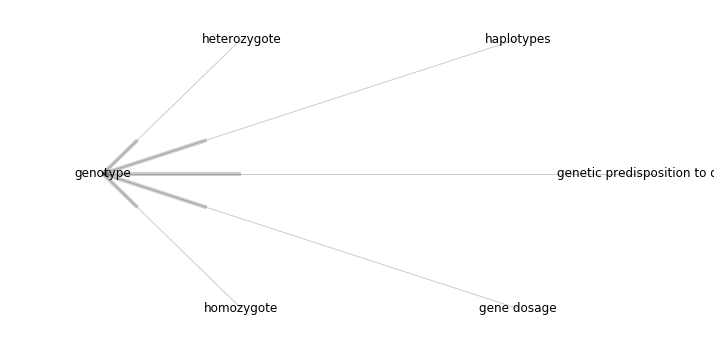

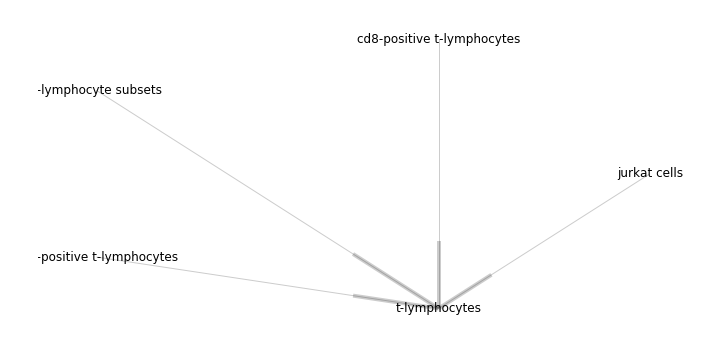

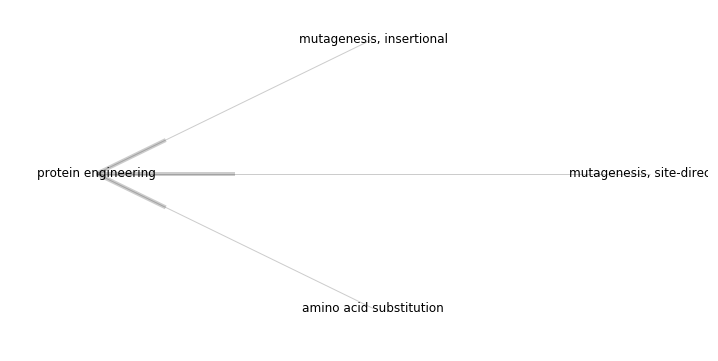

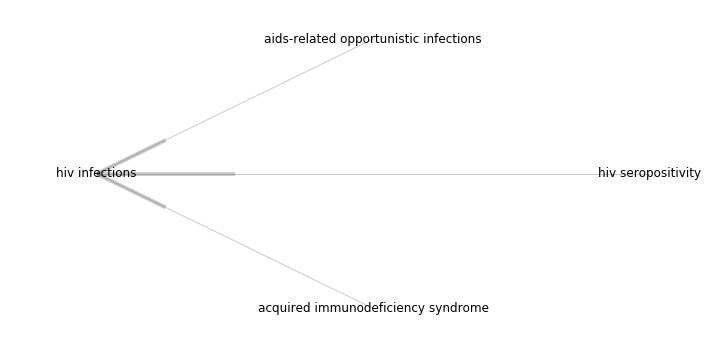

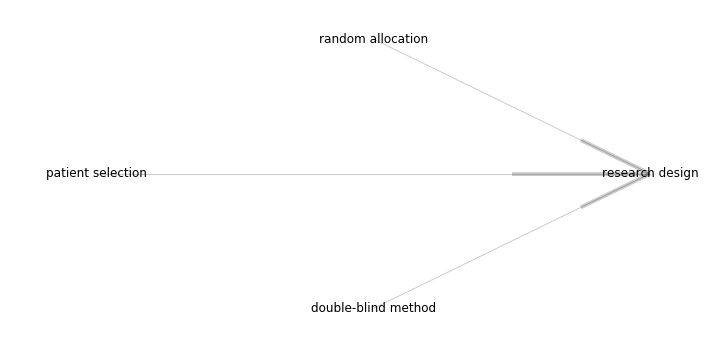

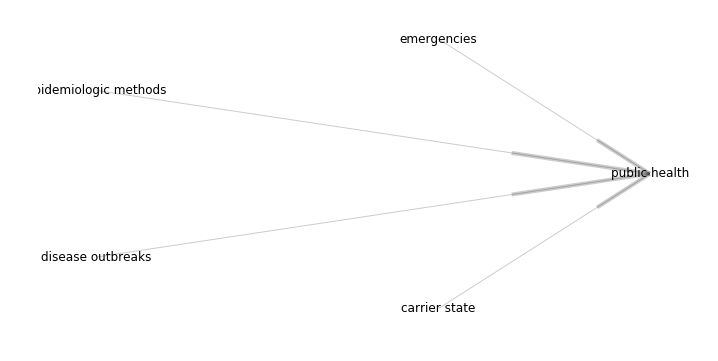

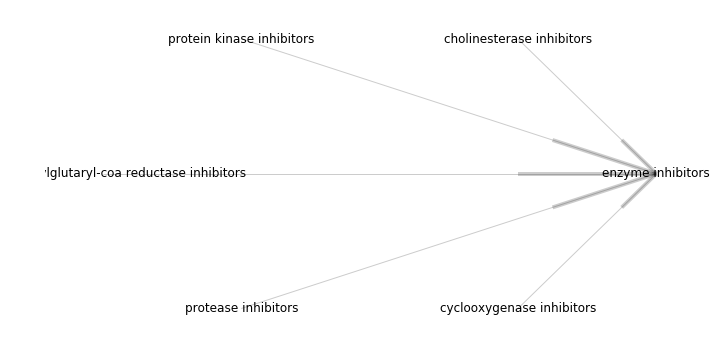

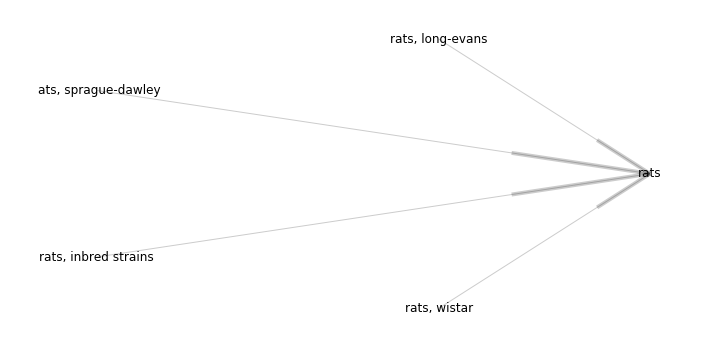

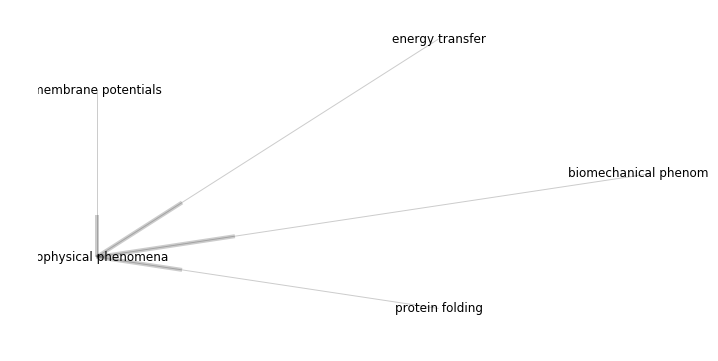

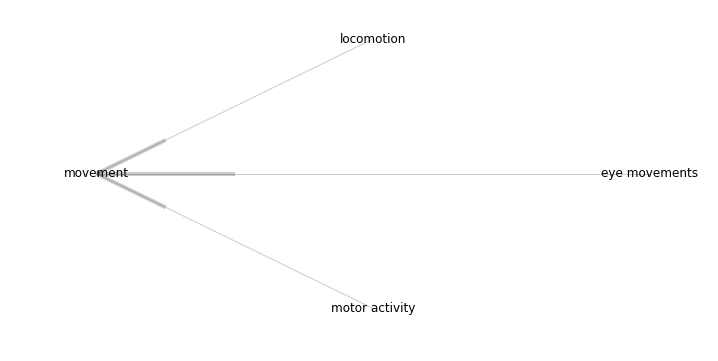

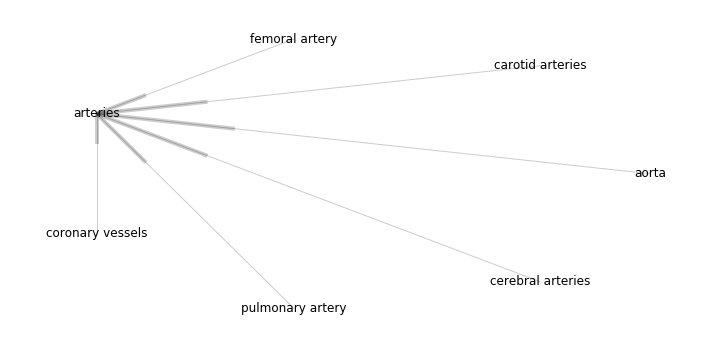

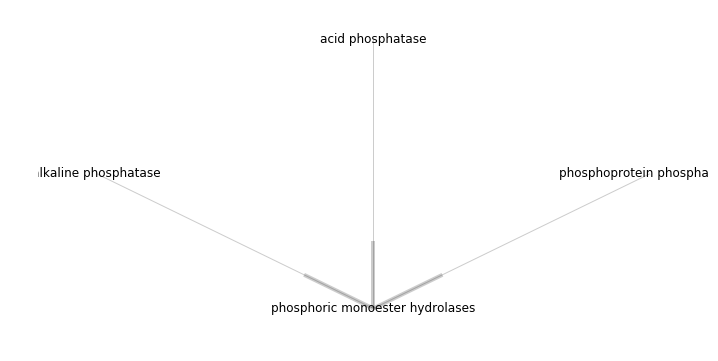

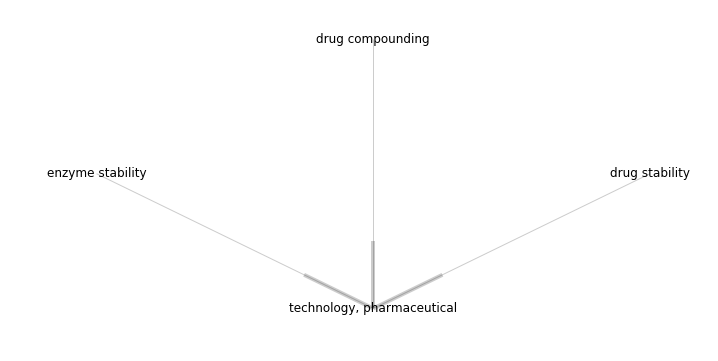

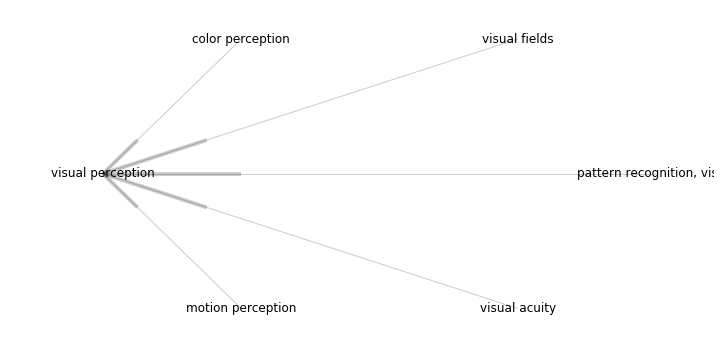

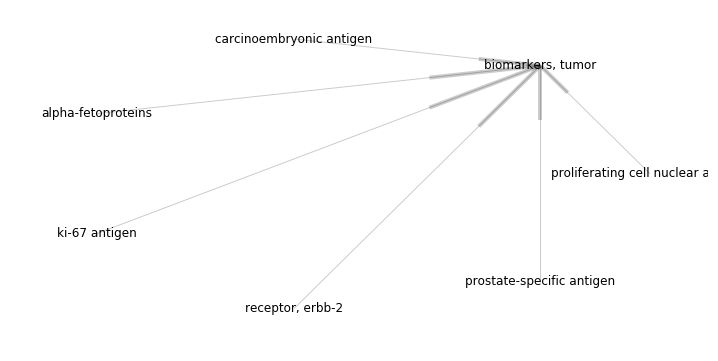

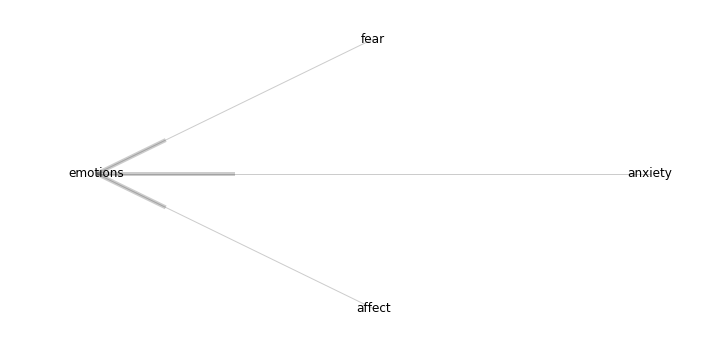

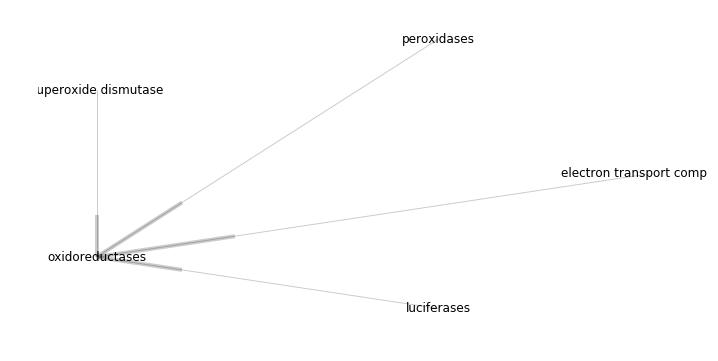

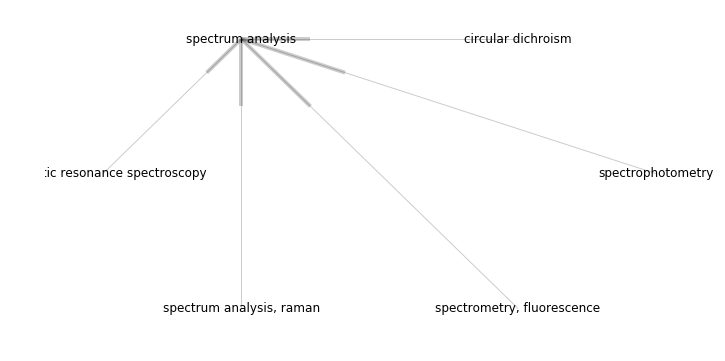

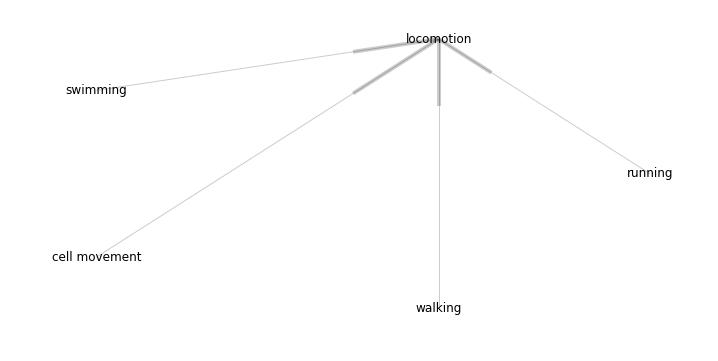

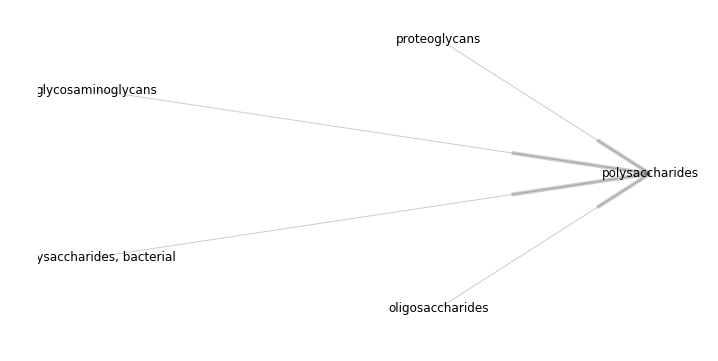

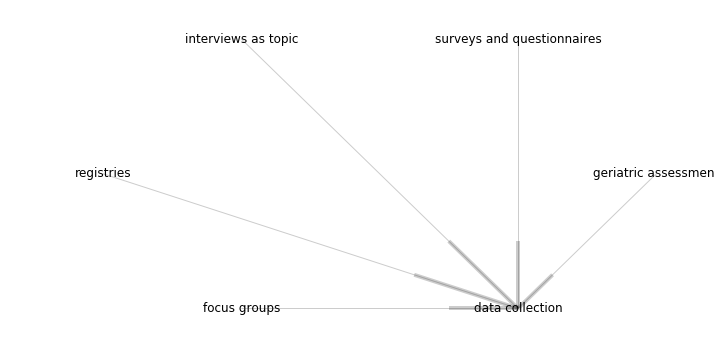

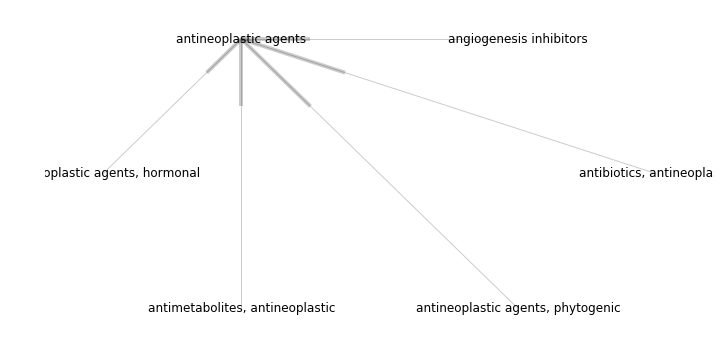

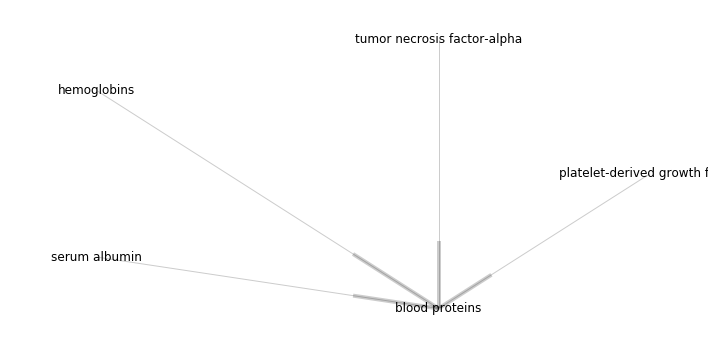

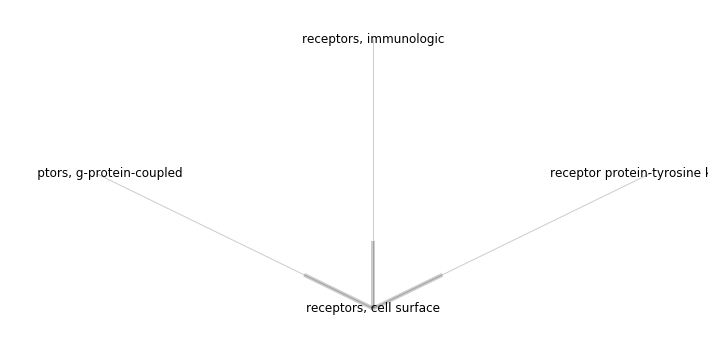

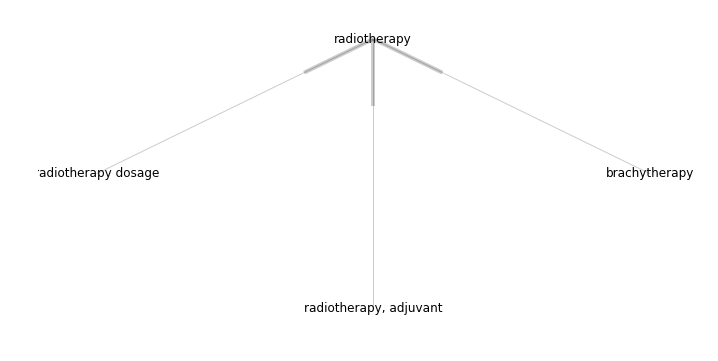

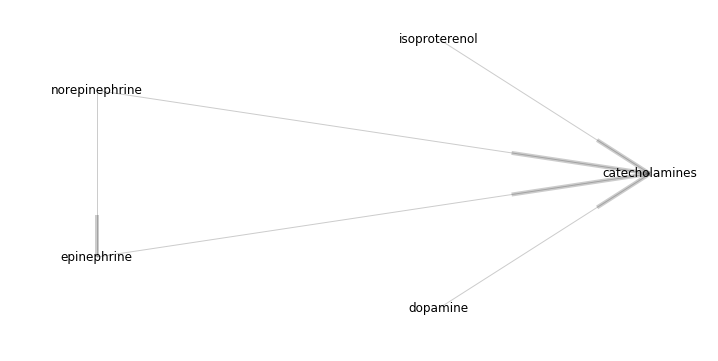

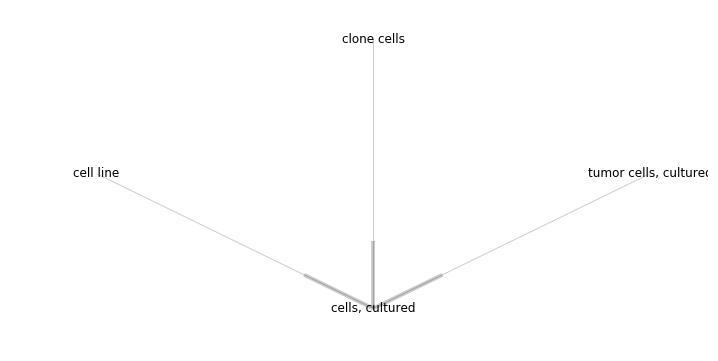

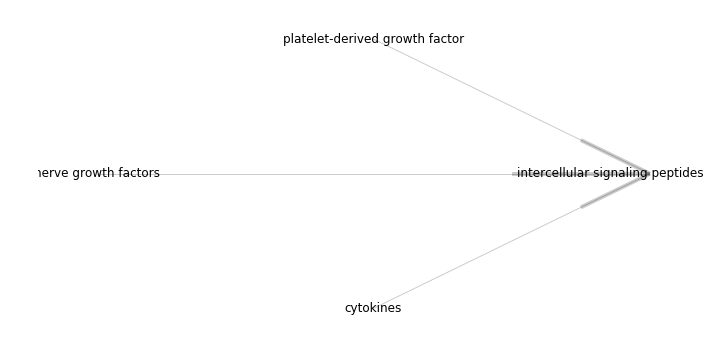

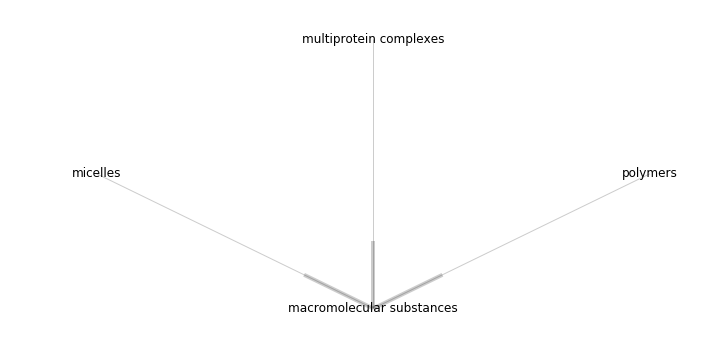

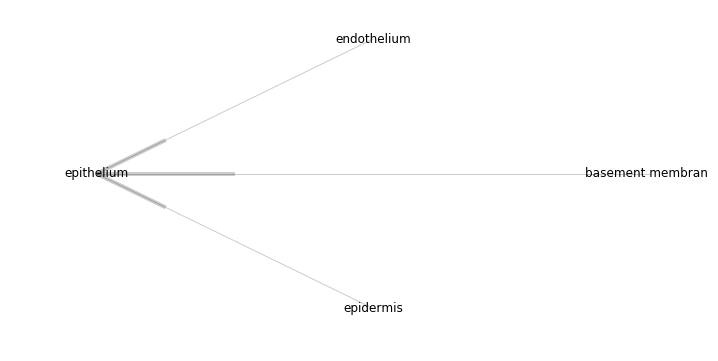

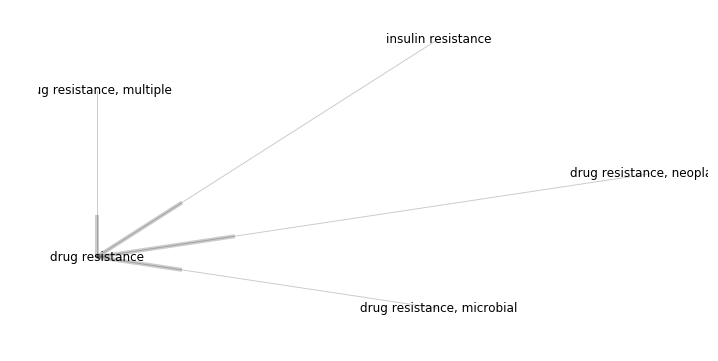

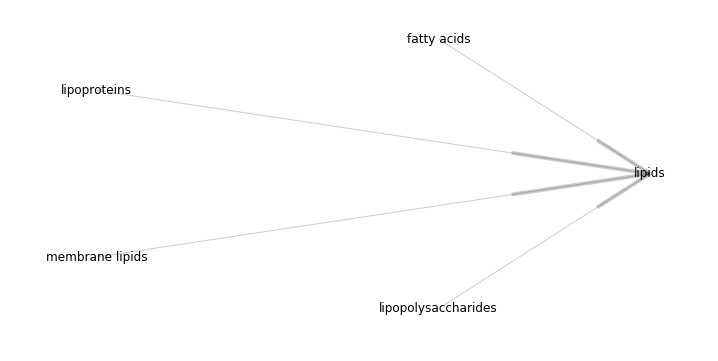

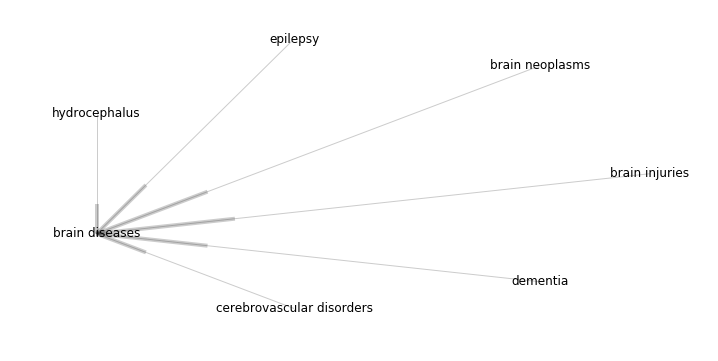

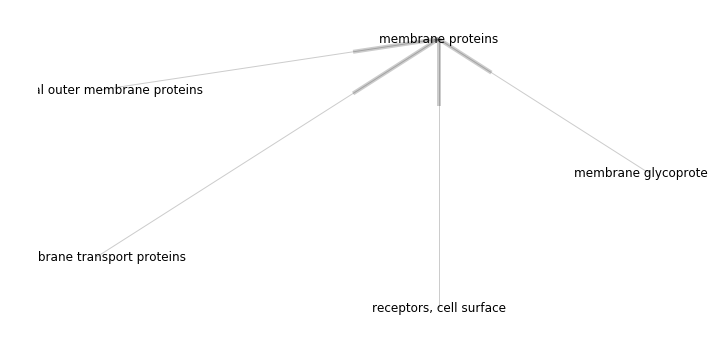

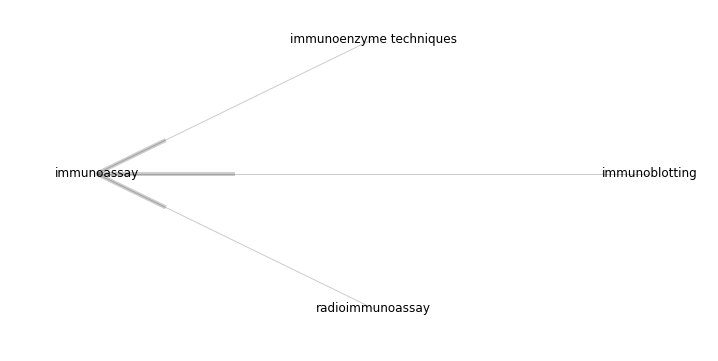

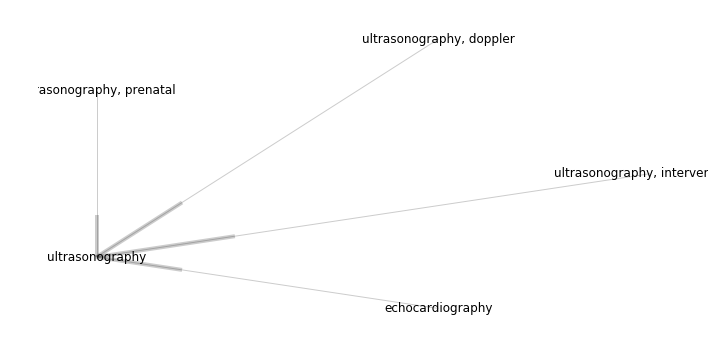

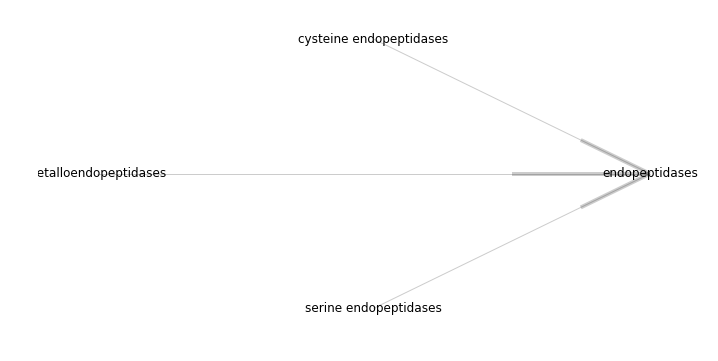

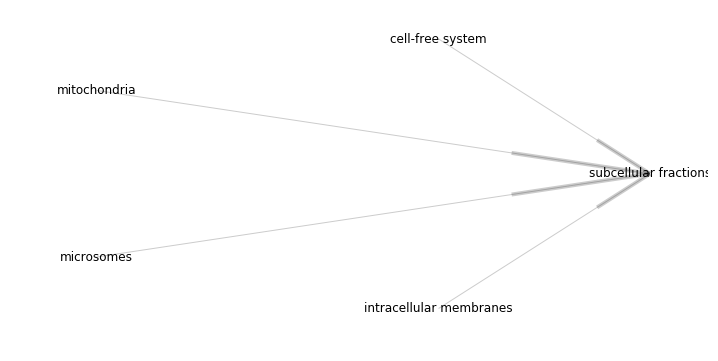

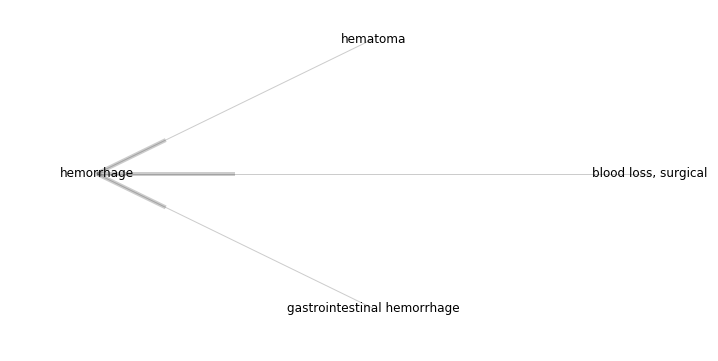

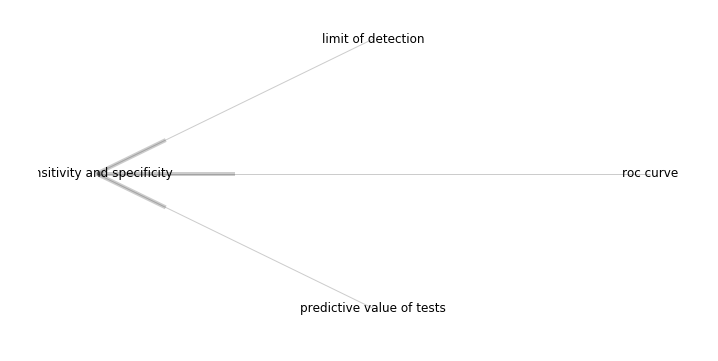

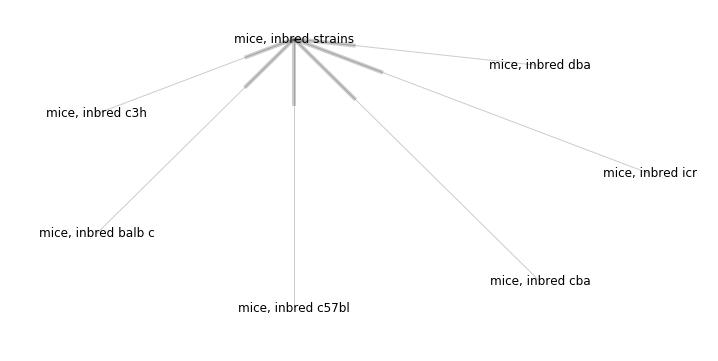

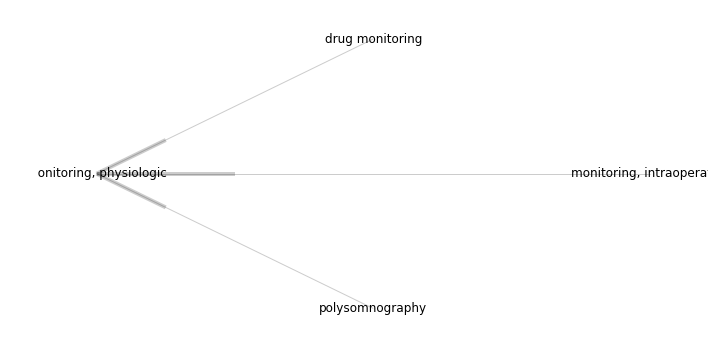

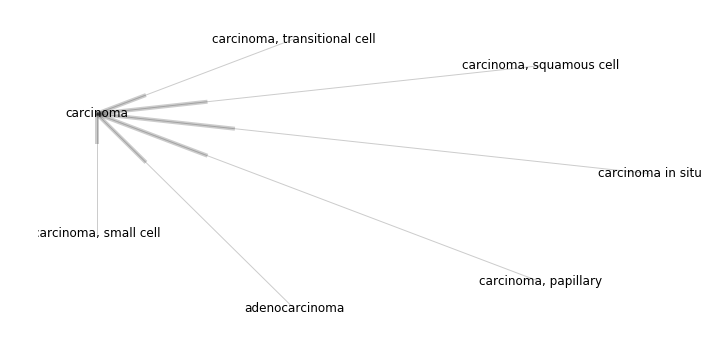

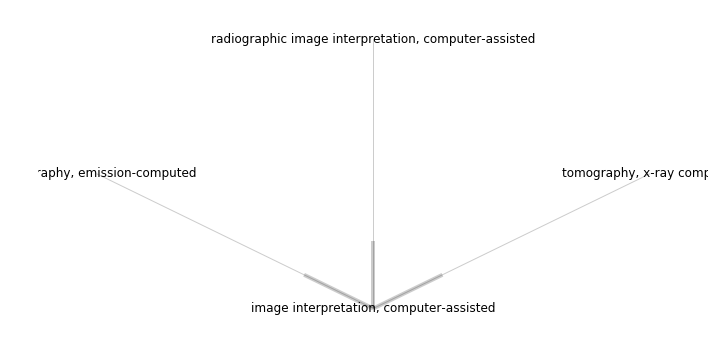

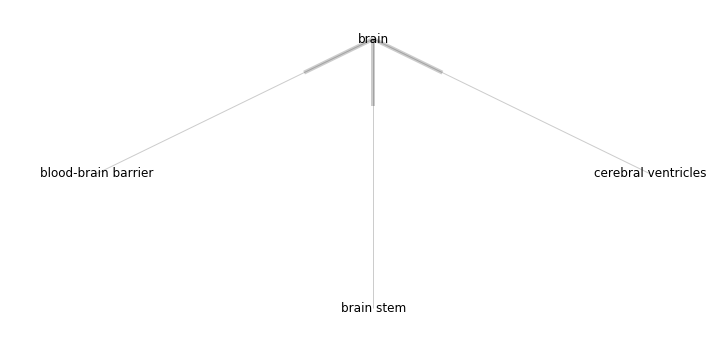

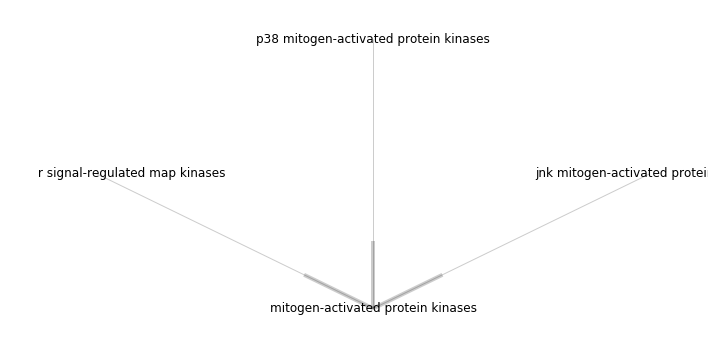

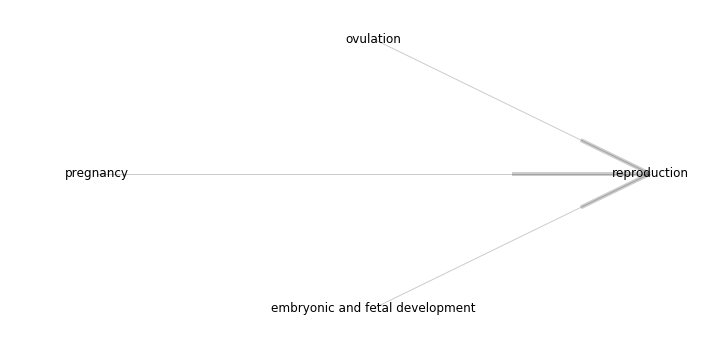

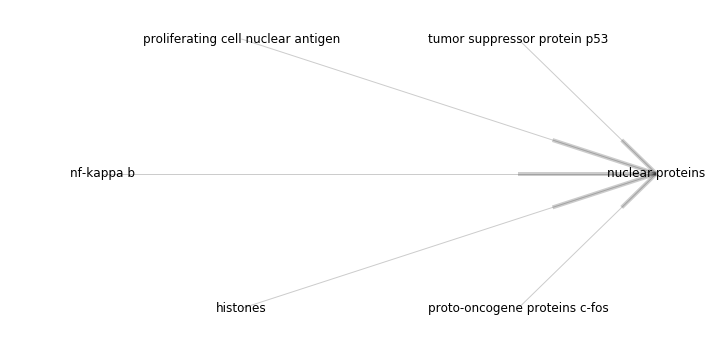

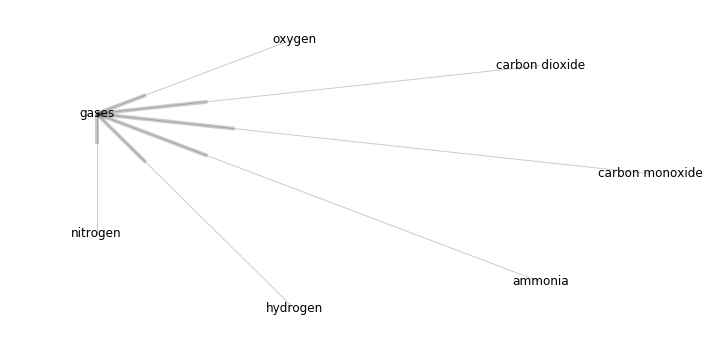

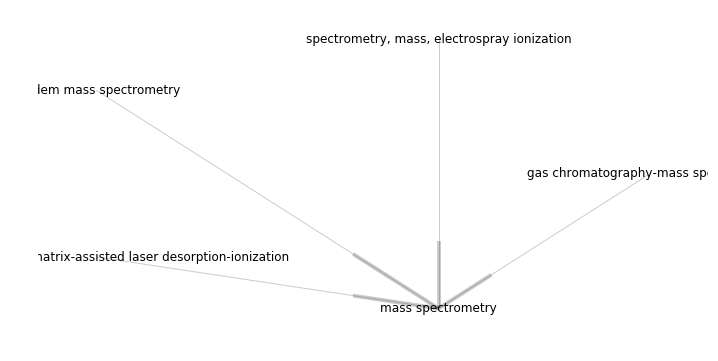

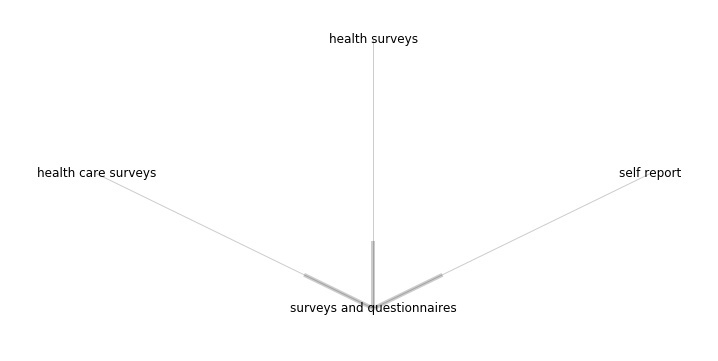

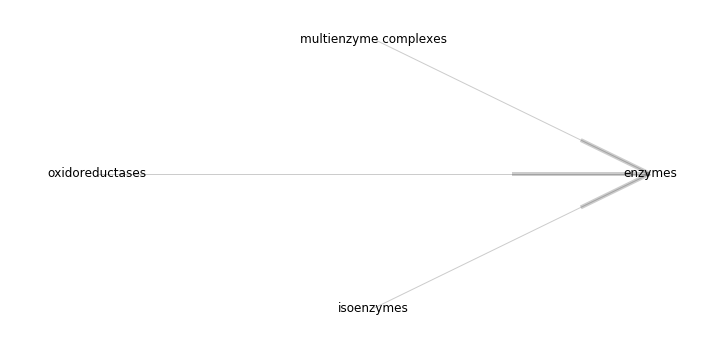

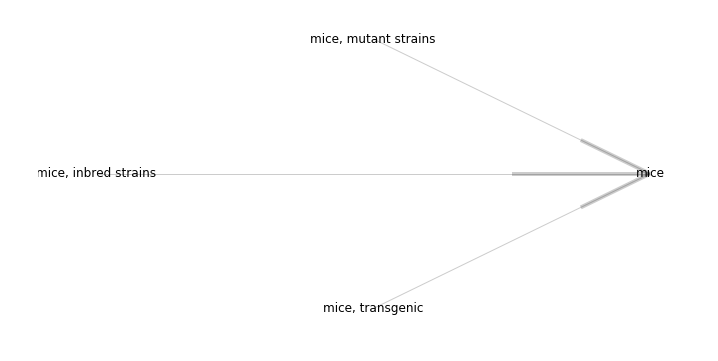

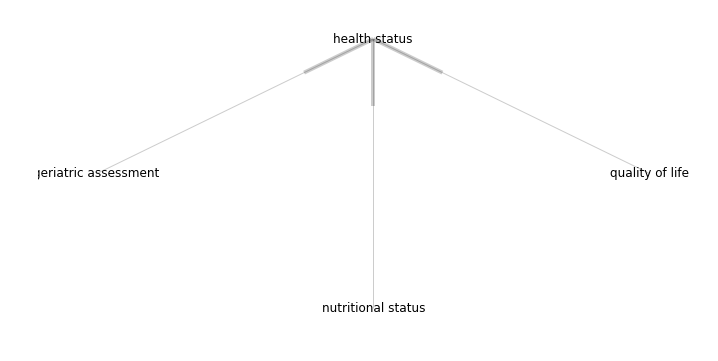

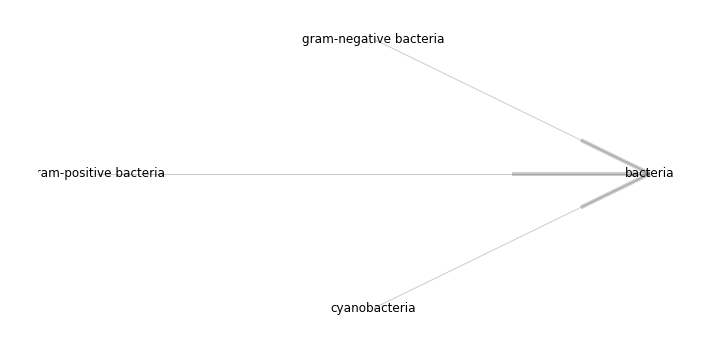

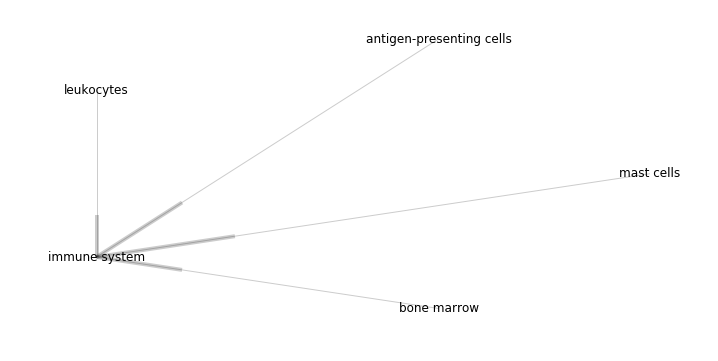

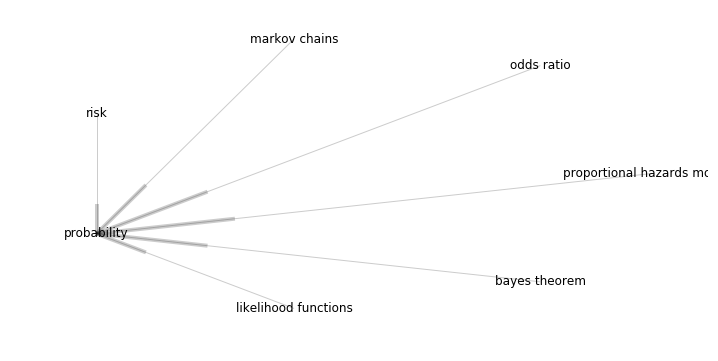

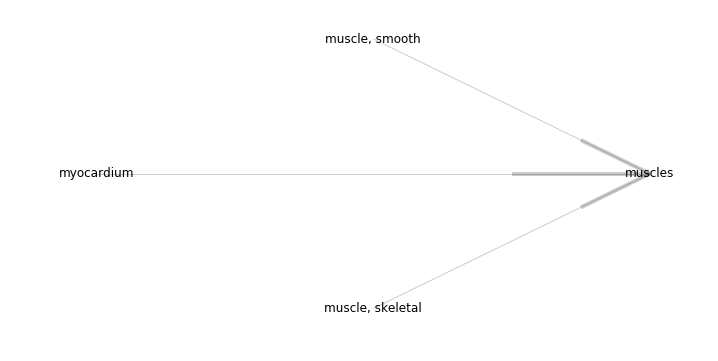

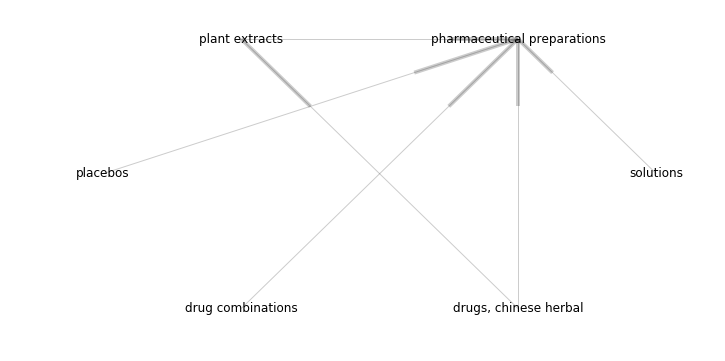

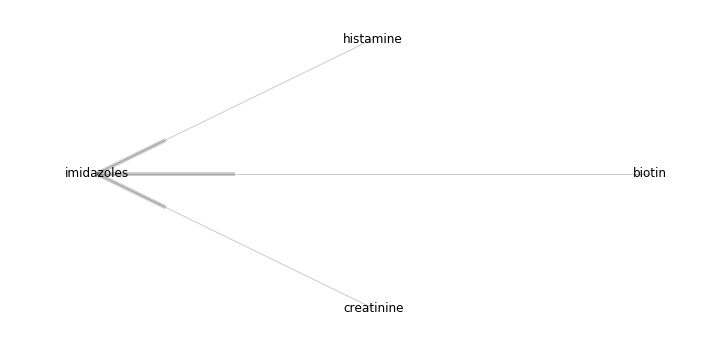

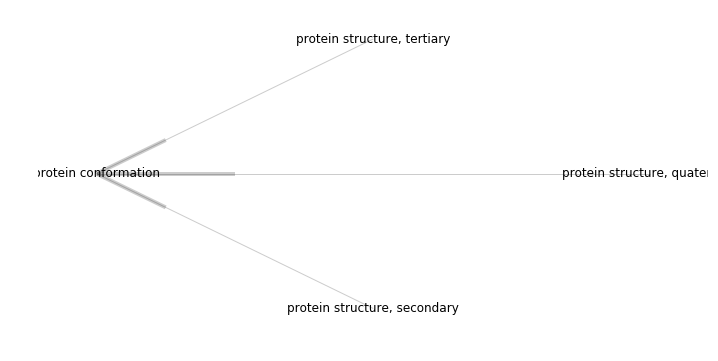

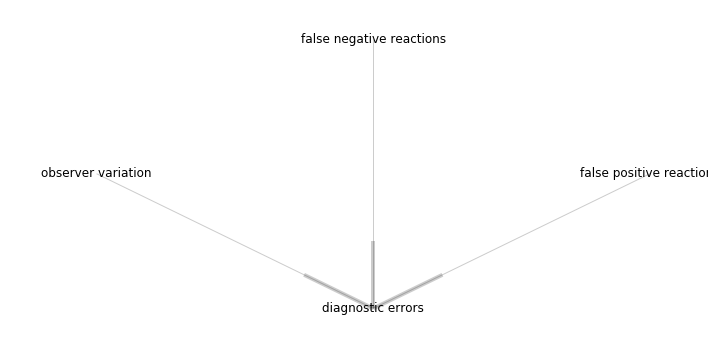

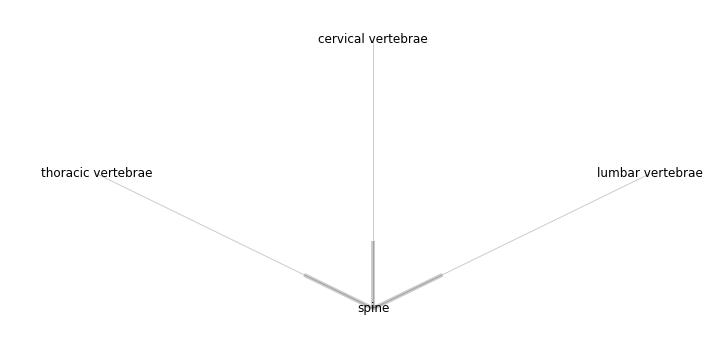

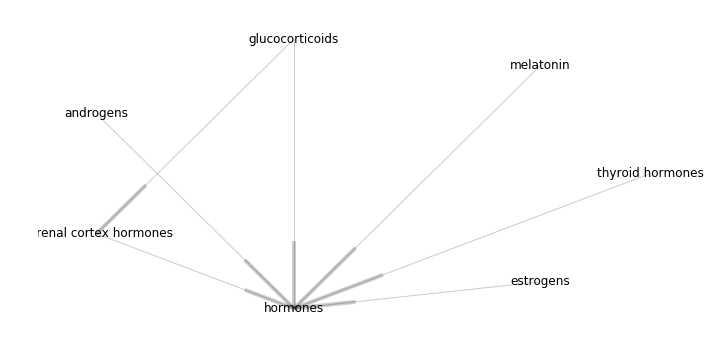

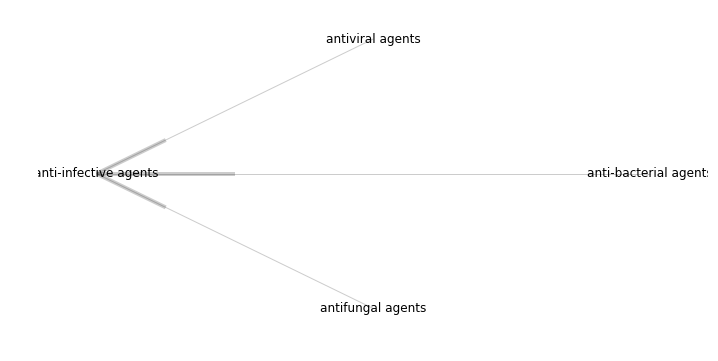

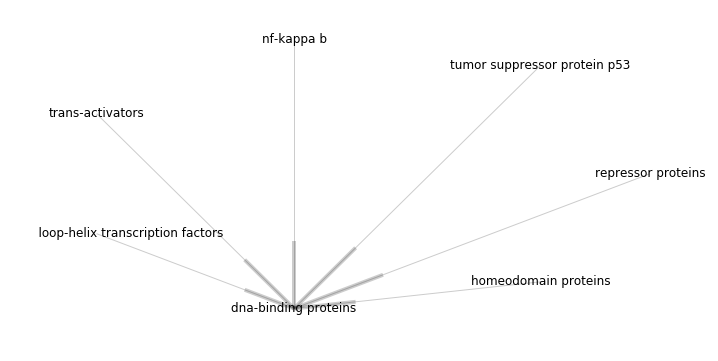

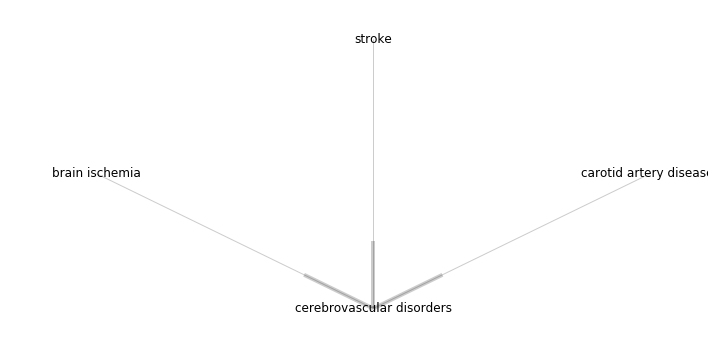

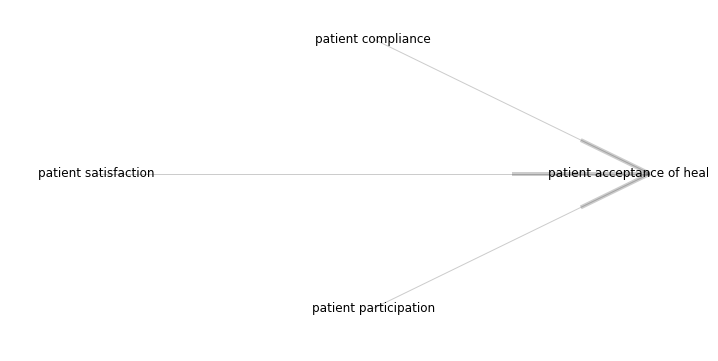

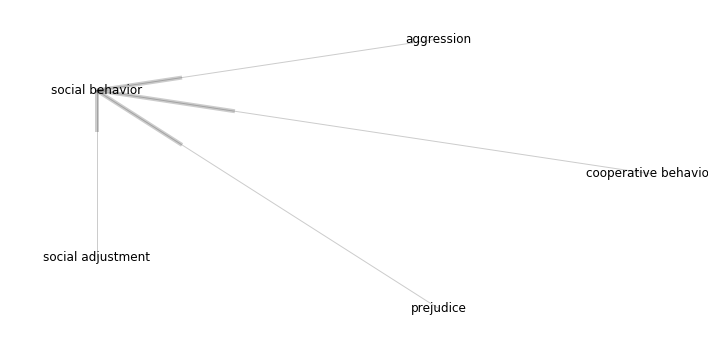

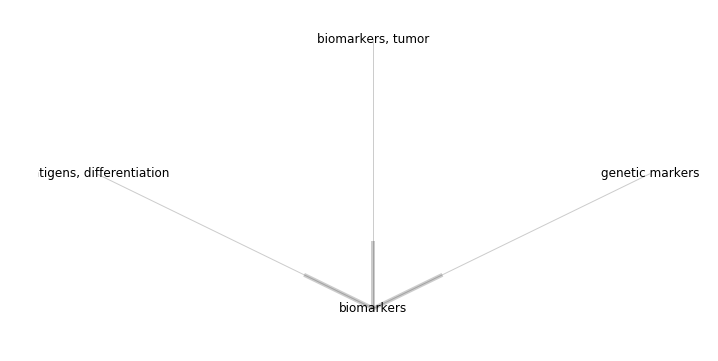

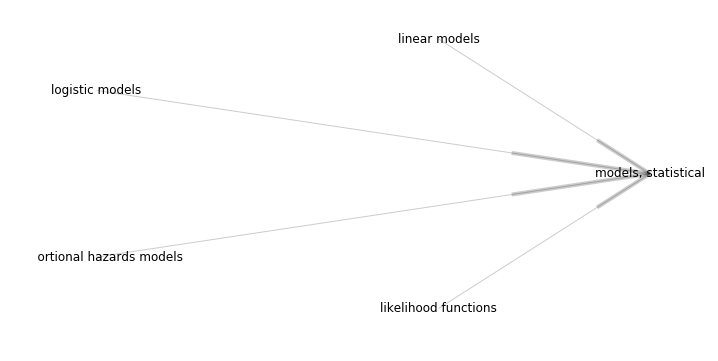

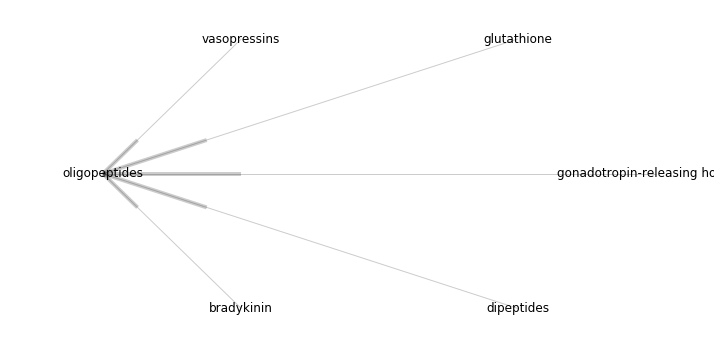

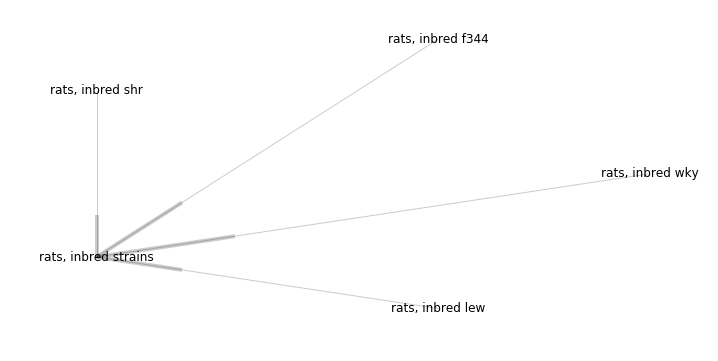

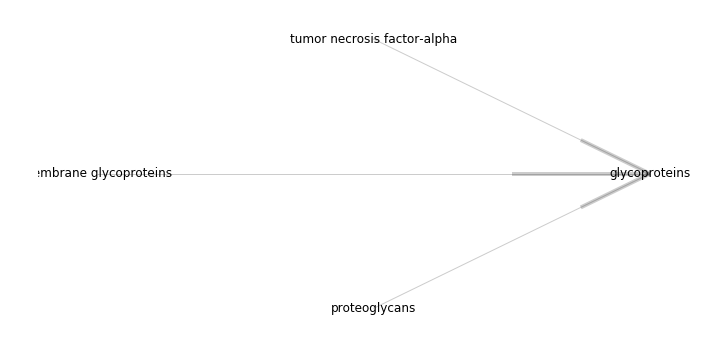

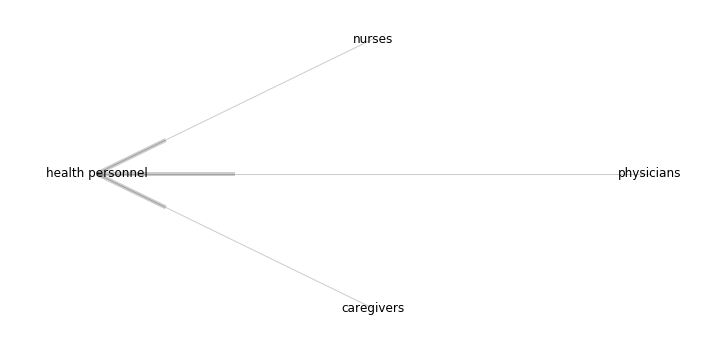

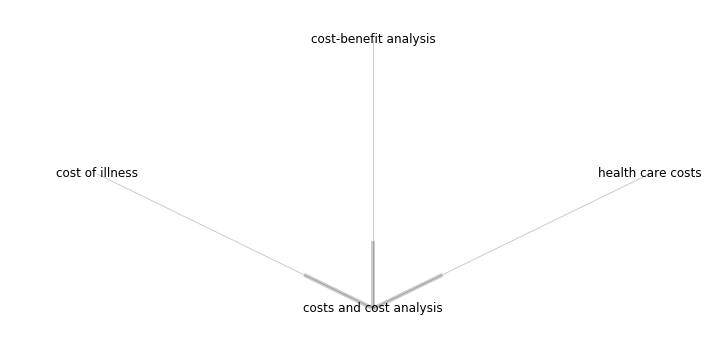

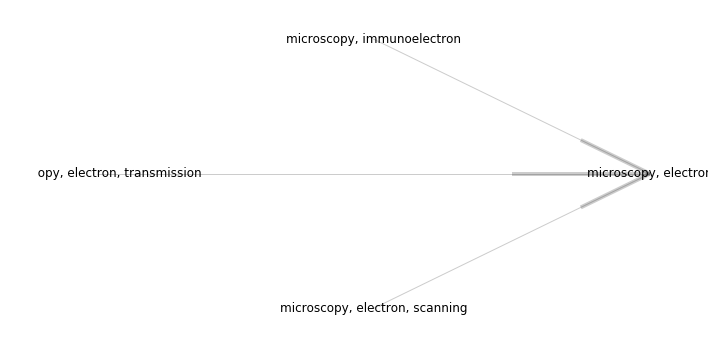

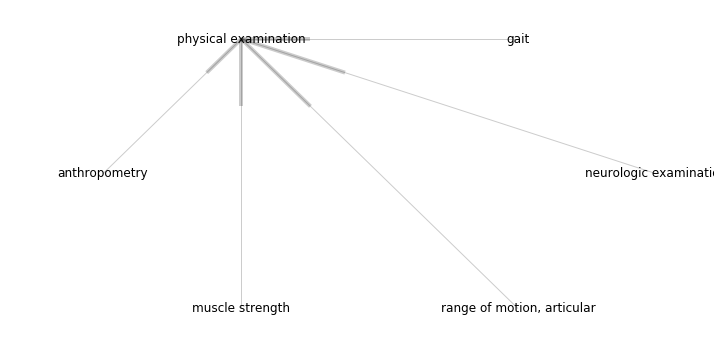

In [11]:
for G in graphs.values():
    plt.figure(figsize=(12, 6))
    plt.axis('off')
    
    pos = nx.circular_layout(G)
    nx.draw_networkx_nodes(G, pos, alpha=0)
    nx.draw_networkx_edges(G, pos, alpha=0.2)
    nx.draw_networkx_labels(G, pos)